# Computational Linear Algebra: PCA Homework

## Exercise 0.0: Initialization
Fill the missing values in this text box. **Remove the information of the second student if you are not working in a team**.

**Academic Year:** 2025/2026

### Team Members (Alphabetical Order):
1. Baiocchi, Lucio (360244);
2. Passafiume, Leonardo (358616).

Now, fill the python list below with the Student IDs of the team

In [31]:
StudentIDs = [360244,358616]  # <-------- Fill this list with Student IDs of the team

## Exercise 0.1: Starting Code-Cell 

Download the .csv files from the web page of the course (*responses_hw.csv* and *columns_hw.csv*) and past them in **the same folder of this notebook**.


Then, run the cell below, **without modifing any line of code**.

The output of this code cell is **your personal subset of the original dataset**, with 2/3 of the original features (i.e., columns) and 3/4 of the original persons (i.e., rows).

### ATTENTION: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL, ANY CHANGE CAN INVALIDATE THE HOMEWORK!

In [32]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np
import pandas as pd
from IPython.display import display

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']
features_all = []
for tt in variables_by_type.keys():
    if tt != 'Demographics':
        features_all += variables_by_type[tt]

def which_features(*StudentIDs):
    random_seed = min(StudentIDs)
    np.random.seed(random_seed)
    features_ = np.random.choice(features_all, int((2 * len(features_all)) / 3), replace=False).tolist()
    features = []
    features_by_type = {tt: [] for tt in variables_by_type.keys() if tt != 'Demographics'}
    for tt in variables_by_type.keys():
        ft_list = variables_by_type[tt]
        for ii in range(len(ft_list)):
            if ft_list[ii] in features_:
                features.append(ft_list[ii])
                features_by_type[tt].append(ft_list[ii])

    return features, features_by_type

features, features_by_type = which_features(*StudentIDs)

print(f'*** THESE ARE THE {len(features)} SELECTED FEATURES (SEE VARIABLE features):')
for ff in features:
    print(f'{ff}')
print('*************************************')
print('')
print('*** SELECTED FEATURES BY TYPES (SEE VARIABLE features_by_type):')
for tt in features_by_type.keys():
    print(f'{tt}: {features_by_type[tt]}')
    print('')
print('*************************************')
print('')
print('*** THESE ARE THE LABELS (SEE VARIABLE labels):')
for ll in labels:
    print(f'{ll}')
print('*************************************')

def which_rows(df, frac, *StudentIDs):
    random_seed = min(StudentIDs)
    df_ = df.sample(frac=frac, random_state=random_seed)
    return df_

responses_hw = pd.read_csv('responses_hw.csv', index_col=0)
responses = which_rows(responses_hw, 0.75, *StudentIDs)
responses = responses.loc[:, features + labels]

responses_ft = responses.loc[:, features]
responses_lb = responses.loc[:, labels]

print('')
print('*** THIS IS YOUR PERSONAL DATASET (features AND labels TOGETHER, SEE VARIABLE responses)')
display(responses)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)')
display(responses_ft)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)')
display(responses_lb)

random_seed = min(StudentIDs)
np.random.seed(random_seed)

your_scaler = np.random.choice(['StandardScaler', 'MinMaxScaler'])


*** THESE ARE THE 93 SELECTED FEATURES (SEE VARIABLE features):
Finances
Branded clothing
Entertainment spending
Spending on looks
Spending on gadgets
Spending on healthy eating
Smoking
Alcohol
Healthy eating
Psychology
Politics
Internet
PC
Chemistry
Reading
Geography
Medicine
Art exhibitions
Religion
Countryside, outdoors
Dancing
Writing
Active sport
Gardening
Celebrities
Science and technology
Theatre
Fun with friends
Adrenaline sports
Movies
Horror
Thriller
Comedy
Sci-fi
Animated
Documentary
Western
Slow songs or fast songs
Classical music
Musical
Pop
Rock
Metal or Hardrock
Punk
Hiphop, Rap
Reggae, Ska
Swing, Jazz
Alternative
Opera
Writing notes
Workaholism
Thinking ahead
Final judgement
Loss of interest
Funniness
Fake
Criminal damage
Decision making
Judgment calls
Hypochondria
Empathy
Giving
Compassion to animals
Loneliness
Cheating in school
Changing the past
Dreams
Charity
Lying
Waiting
New environment
Mood swings
Socializing
Children
Assertiveness
Getting angry
Knowing the right

Finances  Branded clothing  Entertainment spending  Spending on looks  \
610         3                 4                       3                  3   
52          3                 3                       2                  2   
479         3                 4                       5                  4   
123         3                 5                       1                  5   
75          4                 2                       2                  2   
..        ...               ...                     ...                ...   
286         5                 4                       3                  4   
115         4                 1                       4                  4   
207         3                 4                       3                  4   
342         2                 2                       2                  2   
378         4                 1                       1                  1   

     Spending on gadgets  Spending on healthy eating        Smoking  \
610                    3                           5  tried smoking   
52                     4                           5  tried smoking   
479                    3                           3  tried smoking   
123                    5                           1  tried smoking   
75                     3                           4   never smoked   
..                   ...                         ...            ...   
286                    3                           4  tried smoking   
115                    1                           4   never smoked   
207                    4                           4  former smoker   
342                    2                           3  tried smoking   
378                    1                           3  tried smoking   

            Alcohol  Healthy eating  Psychology  ...  Age  Height  Weight  \
610  social drinker               3           3  ...   24     160      55   
52   social drinker               3           2  ...   20     183      83   
479  social drinker               3           4  ...   21     171      60   
123  social drinker               1           4  ...   20     180      71   
75   social drinker               3           4  ...   18     162      50   
..              ...             ...         ...  ...  ...     ...     ...   
286  social drinker               4           2  ...   20     167      57   
115     drink a lot               3           2  ...   25     177      97   
207  social drinker               4           3  ...   19     180      57   
342  social drinker               4           5  ...   28     171      57   
378  social drinker               3           2  ...   20     170      52   

     Number of siblings  Gender   Hand                Education  Only child  \
610                   1  female  right  college/bachelor degree          no   
52                    1    male  right         secondary school          no   
479                   2  female  right         secondary school          no   
123                   0  female  right         secondary school         yes   
75                    1  female   left         secondary school          no   
..                  ...     ...    ...                      ...         ...   
286                   2  female  right  college/bachelor degree          no   
115                   1    male   left         doctorate degree         yes   
207                   1  female  right         secondary school         yes   
342                   1  female  right           masters degree          no   
378                   1  female  right         secondary school          no   

     Home Town Type       Home Type  
610            city  block of flats  
52          village  house/bungalow  
479         village  house/bungalow  
123            city  block of flats  
75             city  house/bungalow  
..              ...             ...  
286         village  house/bungalow  
115            city  block of flats  


*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)


Finances  Branded clothing  Entertainment spending  Spending on looks  \
610         3                 4                       3                  3   
52          3                 3                       2                  2   
479         3                 4                       5                  4   
123         3                 5                       1                  5   
75          4                 2                       2                  2   
..        ...               ...                     ...                ...   
286         5                 4                       3                  4   
115         4                 1                       4                  4   
207         3                 4                       3                  4   
342         2                 2                       2                  2   
378         4                 1                       1                  1   

     Spending on gadgets  Spending on healthy eating        Smoking  \
610                    3                           5  tried smoking   
52                     4                           5  tried smoking   
479                    3                           3  tried smoking   
123                    5                           1  tried smoking   
75                     3                           4   never smoked   
..                   ...                         ...            ...   
286                    3                           4  tried smoking   
115                    1                           4   never smoked   
207                    4                           4  former smoker   
342                    2                           3  tried smoking   
378                    1                           3  tried smoking   

            Alcohol  Healthy eating  Psychology  ...  Flying  Storm  Darkness  \
610  social drinker               3           3  ...       1      1         1   
52   social drinker               3           2  ...       3      2         3   
479  social drinker               3           4  ...       1      1         4   
123  social drinker               1           4  ...       1      1         1   
75   social drinker               3           4  ...       2      2         3   
..              ...             ...         ...  ...     ...    ...       ...   
286  social drinker               4           2  ...       1      1         1   
115     drink a lot               3           2  ...       1      1         1   
207  social drinker               4           3  ...       2      2         3   
342  social drinker               4           5  ...       3      4         3   
378  social drinker               3           2  ...       4      3         3   

     Heights  Spiders  Snakes  Rats  Ageing  Dangerous dogs  \
610        1        1       1     1       2               4   
52         5        1       3     2       1               1   
479        1        5       4     2       3               4   
123        1        1       1     1       2               2   
75         3        5       2     1       2               2   
..       ...      ...     ...   ...     ...             ...   
286        2        2       2     2       3               3   
115        5        1       1     1       1               5   
207        3        5       5     2       4               3   
342        4        5       4     3       4               5   
378        3        5       5     5       2               5   

     Fear of public speaking  
610                        2  
52                         3  
479                        3  
123                        1  
75                         4  
..                       ...  
286                        2  
115                        2  
207                        3  
342                        2  
378                        2  

[506 rows x 93 columns]


*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)


Age  Height  Weight  Number of siblings  Gender   Hand  \
610   24     160      55                   1  female  right   
52    20     183      83                   1    male  right   
479   21     171      60                   2  female  right   
123   20     180      71                   0  female  right   
75    18     162      50                   1  female   left   
..   ...     ...     ...                 ...     ...    ...   
286   20     167      57                   2  female  right   
115   25     177      97                   1    male   left   
207   19     180      57                   1  female  right   
342   28     171      57                   1  female  right   
378   20     170      52                   1  female  right   

                   Education Only child Home Town Type       Home Type  
610  college/bachelor degree         no           city  block of flats  
52          secondary school         no        village  house/bungalow  
479         secondary school         no        village  house/bungalow  
123         secondary school        yes           city  block of flats  
75          secondary school         no           city  house/bungalow  
..                       ...        ...            ...             ...  
286  college/bachelor degree         no        village  house/bungalow  
115         doctorate degree        yes           city  block of flats  
207         secondary school        yes           city  house/bungalow  
342           masters degree         no           city  block of flats  
378         secondary school         no        village  house/bungalow  

[506 rows x 10 columns]

## Exercise 0.2: Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.

For reproducibility, **no extra modules are allowed**.

**DO NOT IMPORT NUMPY NOR PANDAS**, they are already imported.

In [33]:
# DO NOT IMPORT NUMPY AND PANDAS - Already imported
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.cm import get_cmap
import matplotlib.cm as cm
import math

In [34]:

custom_palette = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', 
                  '#fdb462', '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd', 
                  '#ccebc5', '#ffed6f']

filtered_vars = {k: v for k, v in variables_by_type.items() if k != 'Demographics'}

## Exercise 1. Dataset Preprocessing

In this exercise, you have to do the following operations on the dataset of the features **responses_ft**:
1. Create a new dataframe called **responses_ft_enc** by encoding the categorical features (if they exist), motivating your choices;
1. Create a new dataframe called **responses_ft_pp** by preprocessing the data in **responses_ft_enc**, according to the scaler reported in the cell below.

In [35]:
print(f'*** YOU HAVE TO APPLY A PREPROCESSING USING THE {your_scaler}')

*** YOU HAVE TO APPLY A PREPROCESSING USING THE StandardScaler


#### Describe and motivate the encoding operations you will apply (max 150 words):
We will apply the ordinal encoding for the features that are not numerical value, i.e. : smoking, alcohol, lying. 
We chose an ascending order: it starts from never and increase.

#### Describe the preprocessing operation you will apply and comment the effects it may have on the data (max 150 words):
The ordinal encoding, that we will apply, will transform the value from strings to numerical values. Then we will use the standard scaler to scale the values and obtaining mean = 0 and variance = 1

#### Write the code for performing the encoding and preprocessing operations of the exercise. Show the encoded data and the preprocessed data you obtain, plus any additional table/value that can be useful for commenting the results:

For doing this exercise, fill the cells below following the instructions you read.

In [36]:
responses_ft_enc = responses_ft.copy()

# Smoking feature
categories_order = [['never smoked', 'tried smoking', 'former smoker', 'current smoker']]
oe = OrdinalEncoder(categories=categories_order)
responses_ft_enc['Smoking'] = oe.fit_transform(responses_ft_enc[['Smoking']])

# Alcohol feature
categories_order = [['never', 'social drinker', 'drink a lot']]
oe = OrdinalEncoder(categories=categories_order)
responses_ft_enc['Alcohol'] = oe.fit_transform(responses_ft_enc[['Alcohol']])

# Lying feature
categories_order = [['never', 'only to avoid hurting someone', 'sometimes', 'everytime it suits me']]
oe = OrdinalEncoder(categories=categories_order)
responses_ft_enc['Lying'] = oe.fit_transform(responses_ft_enc[['Lying']])

In [37]:
scaler = StandardScaler()
responses_ft_pp = scaler.fit_transform(responses_ft_enc)
responses_ft_pp = pd.DataFrame(data=responses_ft_pp, columns=responses_ft_enc.columns)


display(responses_ft[['Smoking', 'Alcohol', 'Lying']])
display(responses_ft_enc[['Smoking', 'Alcohol', 'Lying']])
display(responses_ft_pp[['Smoking', 'Alcohol', 'Lying']])

Smoking         Alcohol                          Lying
610  tried smoking  social drinker  only to avoid hurting someone
52   tried smoking  social drinker                      sometimes
479  tried smoking  social drinker                          never
123  tried smoking  social drinker          everytime it suits me
75    never smoked  social drinker  only to avoid hurting someone
..             ...             ...                            ...
286  tried smoking  social drinker  only to avoid hurting someone
115   never smoked     drink a lot          everytime it suits me
207  former smoker  social drinker  only to avoid hurting someone
342  tried smoking  social drinker                      sometimes
378  tried smoking  social drinker                      sometimes

[506 rows x 3 columns]

Smoking  Alcohol  Lying
610      1.0      1.0    1.0
52       1.0      1.0    2.0
479      1.0      1.0    0.0
123      1.0      1.0    3.0
75       0.0      1.0    1.0
..       ...      ...    ...
286      1.0      1.0    1.0
115      0.0      2.0    3.0
207      2.0      1.0    1.0
342      1.0      1.0    2.0
378      1.0      1.0    2.0

[506 rows x 3 columns]

Smoking   Alcohol     Lying
0   -0.312067 -0.223601 -1.095814
1   -0.312067 -0.223601  0.304393
2   -0.312067 -0.223601 -2.496021
3   -0.312067 -0.223601  1.704600
4   -1.305184 -0.223601 -1.095814
..        ...       ...       ...
501 -0.312067 -0.223601 -1.095814
502 -1.305184  1.544247  1.704600
503  0.681051 -0.223601 -1.095814
504 -0.312067 -0.223601  0.304393
505 -0.312067 -0.223601  0.304393

[506 rows x 3 columns]

#### Comment the results obtained after the preprocessing operation (max 100 words):
Now all the features are represented by numerical values scaled to have mean = 0 and variance = 1. By doing this none of the features will predominate over the others and all of them will have the same wheight.

## Exercise 2. Analyzing the Variance and the PCs

In this exercise, you have to do the following operations:
1. compute and visualize the variance of all the features in *responses_ft_enc* and *responses_ft_pp*;
1. compute all the $n$ Principal Components (PCs) for *responses_ft_enc* and *responses_ft_pp*, separately, and visualize the curves of the cumulative explained variances.

For doing this exercise, fill the cells below following the instructions you read.

#### Write the code for computing and visualizing the variance of the features of the two datasets:

In [ ]:
#       1. compute and visualize the variance of all the features in *responses_ft_enc* and *responses_ft_pp*;

first_to_print = 20

sorted_variance_enc = responses_ft_enc.var().sort_values(ascending=False)
sorted_variance_pp = responses_ft_pp.var().sort_values(ascending=False)


print("--- Variance ENCODED ---")
display(sorted_variance_enc.head(first_to_print))

print("\n--- Variance POST-PROCESSED ---")
display(sorted_variance_pp.head(first_to_print))

--- Variance ENCODED ---


Spiders              2.365675
Criminal damage      2.337577
Snakes               2.233616
Active sport         2.213454
Reading              2.209795
Writing notes        2.116558
Life struggles       2.011740
Dancing              1.999076
Adrenaline sports    1.944899
Dangerous dogs       1.940031
Final judgement      1.928607
Metal or Hardrock    1.918131
Rats                 1.914546
Horror               1.900415
Chemistry            1.866493
Ageing               1.852730
Hiphop, Rap          1.837968
Art exhibitions      1.830302
Alternative          1.806410
Loss of interest     1.796928
dtype: float64


--- Variance POST-PROCESSED ---


Medicine                    1.00198
Animated                    1.00198
Documentary                 1.00198
Knowing the right people    1.00198
Lying                       1.00198
Fake                        1.00198
Getting angry               1.00198
Religion                    1.00198
Interests or hobbies        1.00198
Socializing                 1.00198
Countryside, outdoors       1.00198
Healthy eating              1.00198
Metal or Hardrock           1.00198
Opera                       1.00198
Science and technology      1.00198
Heights                     1.00198
Mood swings                 1.00198
Alcohol                     1.00198
Changing the past           1.00198
Waiting                     1.00198
dtype: float64

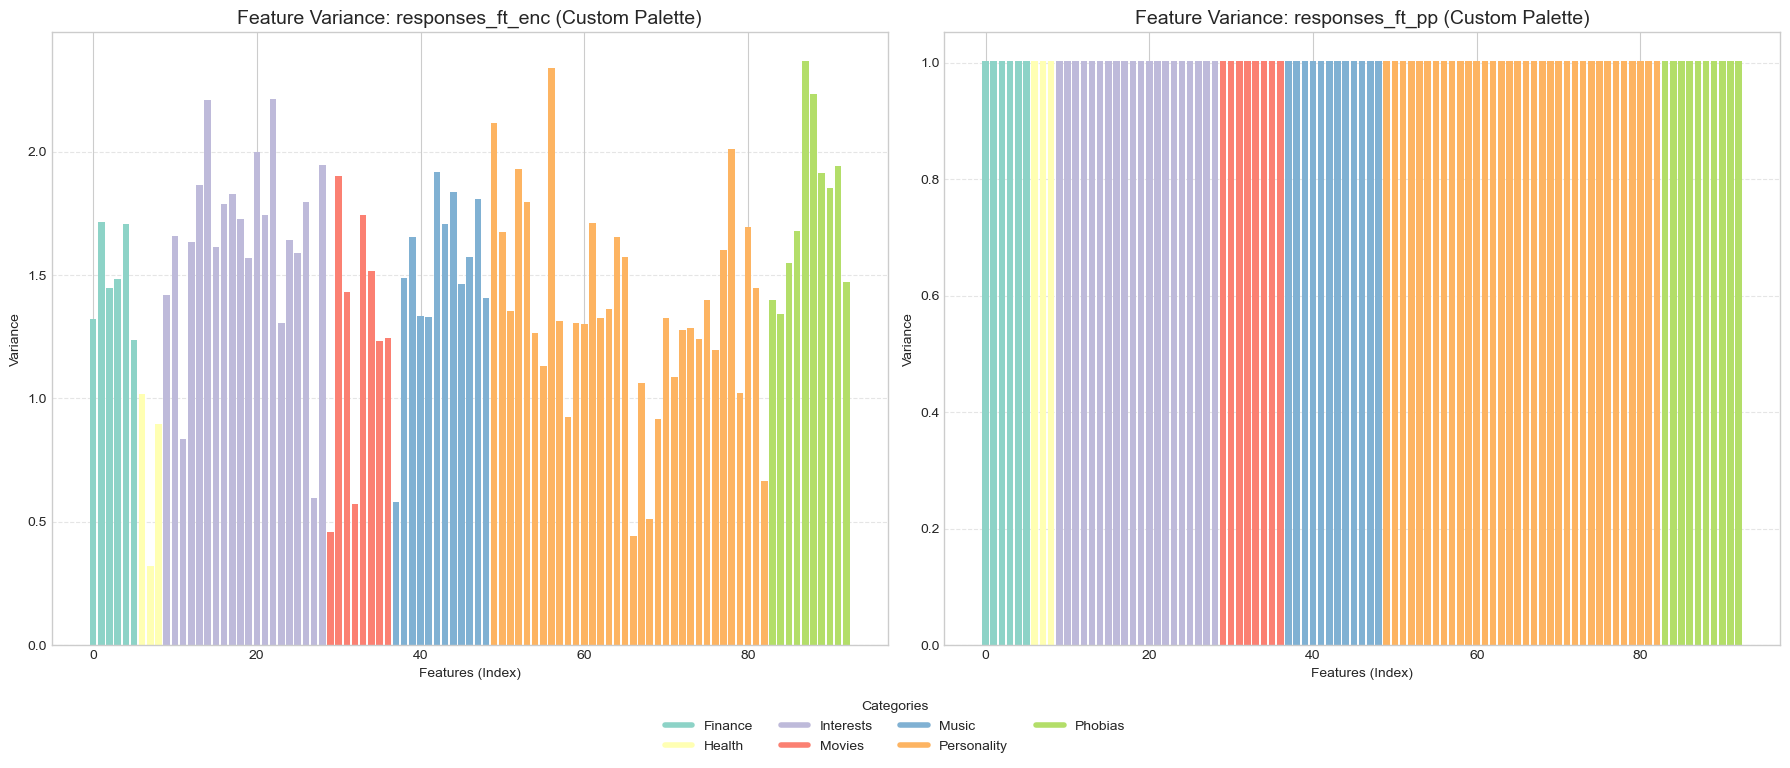

In [39]:
filtered_variables = {k: v for k, v in variables_by_type.items() if k != 'Demographics'}
cols_to_keep = [col for cols in filtered_variables.values() for col in cols]


var_enc = responses_ft_enc[responses_ft_enc.columns.intersection(cols_to_keep)].var()
var_pp = responses_ft_pp[responses_ft_pp.columns.intersection(cols_to_keep)].var()


unique_cats = list(filtered_variables.keys())

cat_colors = {cat: custom_palette[i % len(custom_palette)] for i, cat in enumerate(unique_cats)}
col_to_cat = {col: cat for cat, cols in filtered_variables.items() for col in cols}


colors_enc = [cat_colors.get(col_to_cat.get(col), 'grey') for col in var_enc.index]
colors_pp = [cat_colors.get(col_to_cat.get(col), 'grey') for col in var_pp.index]

# --- PLOTTING ---
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# Left plot
axes[0].bar(range(len(var_enc)), var_enc.values, color=colors_enc)
axes[0].set_title('Feature Variance: responses_ft_enc (Custom Palette)', fontsize=14)
axes[0].set_xlabel('Features (Index)')
axes[0].set_ylabel('Variance')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Right plot
axes[1].bar(range(len(var_pp)), var_pp.values, color=colors_pp)
axes[1].set_title('Feature Variance: responses_ft_pp (Custom Palette)', fontsize=14)
axes[1].set_xlabel('Features (Index)')
axes[1].set_ylabel('Variance')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)


legend_elements = [Line2D([0], [0], color=cat_colors[cat], lw=4, label=cat) for cat in unique_cats]
fig.legend(handles=legend_elements, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.1), title="Categories")

plt.tight_layout()
plt.show()

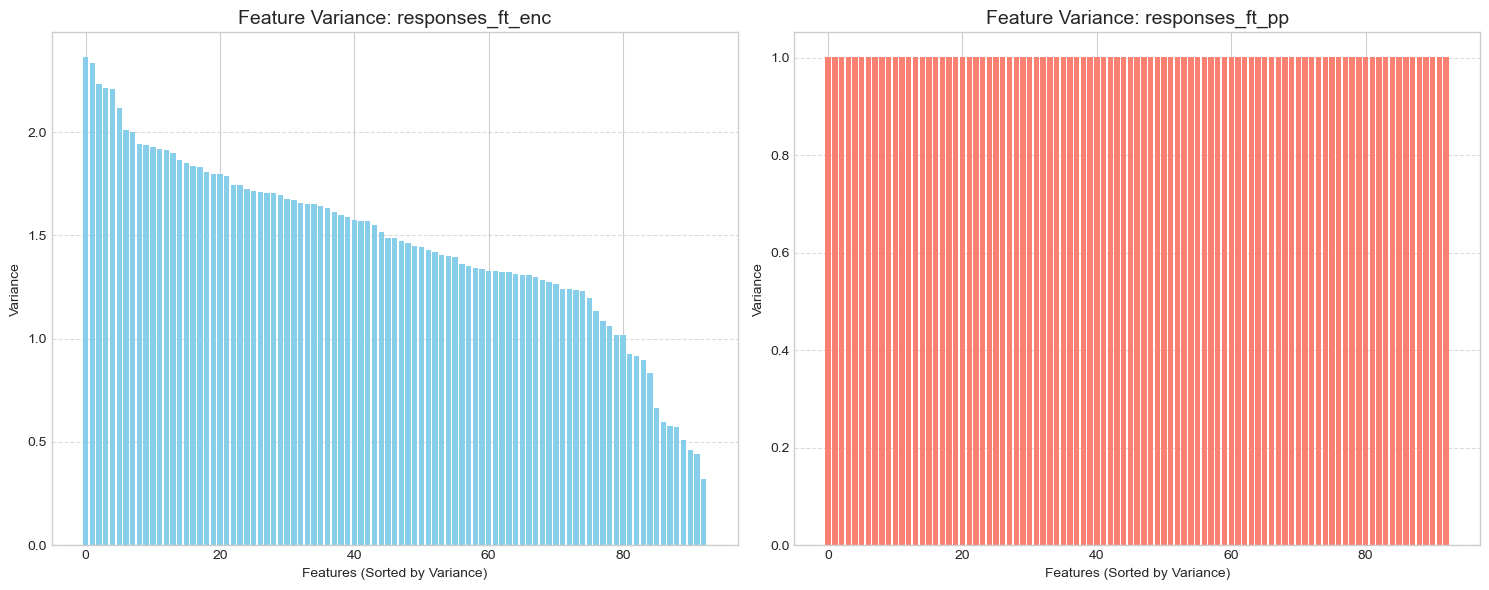

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot for responses_ft_enc
axes[0].bar(range(len(sorted_variance_enc)), sorted_variance_enc.values, color='skyblue')
axes[0].set_title('Feature Variance: responses_ft_enc', fontsize=14)
axes[0].set_xlabel('Features (Sorted by Variance)')
axes[0].set_ylabel('Variance')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for responses_ft_pp
axes[1].bar(range(len(sorted_variance_pp)), sorted_variance_pp.values, color='salmon')
axes[1].set_title('Feature Variance: responses_ft_pp', fontsize=14)
axes[1].set_xlabel('Features (Sorted by Variance)')
axes[1].set_ylabel('Variance')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Comment the results obtained for the variances (max 150 words):
The two charts illustrate the effect of feature scaling.

- Left Chart (responses_ft_enc): This plot displays heterogeneous variances, with values descending from approximately 2.3 down to 0.3. This indicates that in the _enc (encoded) dataset, features are on different scales or have different natural distributions. Without normalization, the features with higher variance could disproportionately influence distance-based machine learning models.

- Right Chart (responses_ft_pp): This plot shows uniform variance, where every feature has a variance of exactly 1.0. This confirms that the _pp (pre-processed) dataset has undergone Standardization (Z-score normalization). This technique rescales features to have a mean of 0 and a standard deviation (and variance) of 1, ensuring all features contribute equally to the model's objective function.

#### Write the code for computing all the $n$ PCs of the two datasets, separately, and for visualizing the curves of cumulative explained variances:

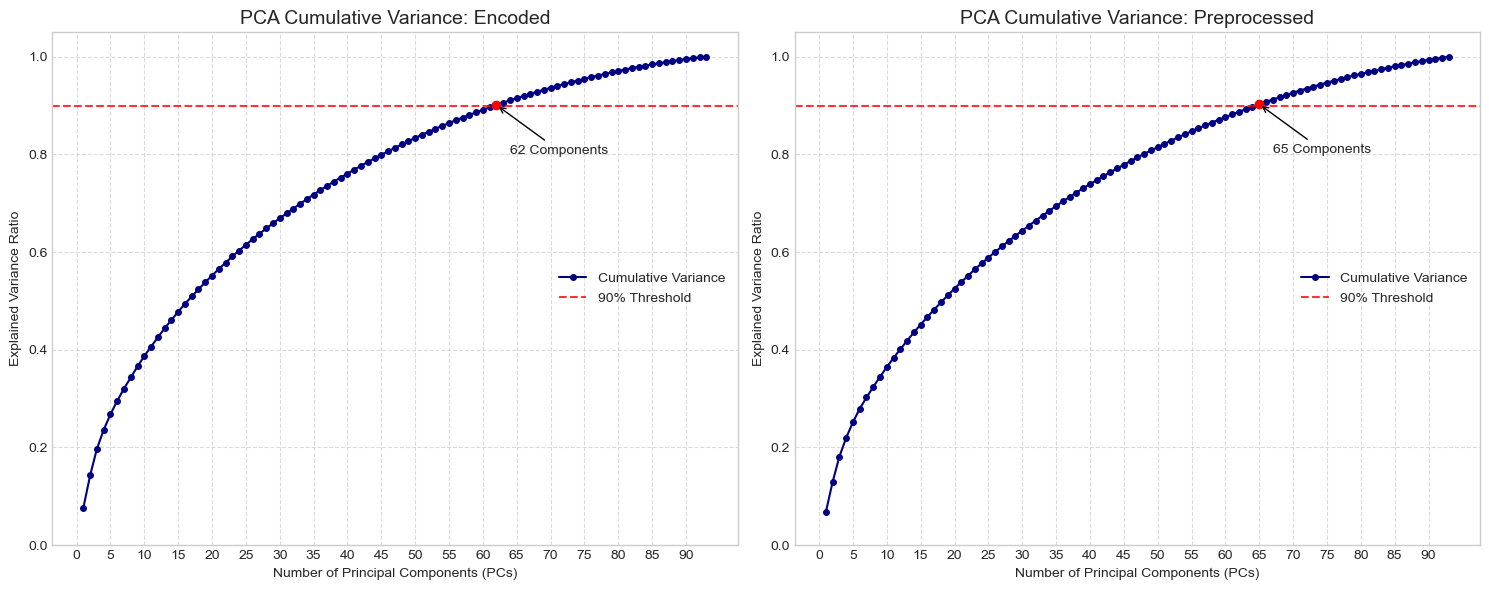

In [ ]:
#       2. compute all the $n$ Principal Components (PCs) 
#       for *responses_ft_enc* and *responses_ft_pp*, separately,
#       and visualize the curves of the cumulative explained variances.

def plot_pca_cumulative(data, title, ax):
    # 1. Fit PCA
    pca = PCA()
    pca.fit(data)
    
    # 2. Calculations
    exp_var = pca.explained_variance_ratio_
    cum_var = np.cumsum(exp_var)
    n_components = len(exp_var)
    x = np.arange(1, n_components + 1)
    

    threshold = 0.90
    ax.plot(x, cum_var, marker='o', linestyle='-', markersize=4, color='navy', label='Cumulative Variance')
    ax.axhline(y=threshold, color='r', linestyle='--', alpha=0.8, label=f'{int(threshold*100)}% Threshold')
    
    # first component crossing 90%
    idx_threshold = np.argmax(cum_var >= threshold) 
    val_threshold = x[idx_threshold] 
    
    # Draw point and text
    ax.plot(val_threshold, cum_var[idx_threshold], 'ro') 
    ax.annotate(f'{val_threshold} Components', 
                xy=(val_threshold, cum_var[idx_threshold]), 
                xytext=(val_threshold + 2, cum_var[idx_threshold] - 0.1),
                arrowprops=dict(arrowstyle="->", color='black'))
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Number of Principal Components (PCs)')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_ylim(0, 1.05)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # X-axis ticks management
    if n_components > 20:
        ax.set_xticks(np.arange(0, n_components + 1, 5))
    else:
        ax.set_xticks(x)

    ax.legend(loc='center right')
    return pca

# Create figure for side-by-side comparison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Run and plot for Encoded dataset
pca_enc = plot_pca_cumulative(responses_ft_enc, 'PCA Cumulative Variance: Encoded', axes[0])

# Run and plot for Preprocessed dataset
pca_pp = plot_pca_cumulative(responses_ft_pp, 'PCA Cumulative Variance: Preprocessed', axes[1])

plt.tight_layout()
plt.show()

# This visualization help to decide how many components are needed to explain a 
# specific percentage of the data's variability.

#### Comment the results obtained for the cumulative explained variances, knowing the vaues in the datasets and the fetures' variances (max 150 words):

The Encoded dataset requires 62 components to explain 90% of the variance, while the Preprocessed dataset requires slightly more, at 65 components.

This result is consistent with the effects of standardization. In the Encoded dataset, features with higher variances (up to ~2.3) naturally dominate the early principal components, allowing the model to capture "variance" faster and compress the data more efficiently.

Conversely, in the Preprocessed dataset, all feature variances are normalized to 1.0. Because the variance is more evenly distributed across all original dimensions, the Principal Components cannot rely on scale differences to capture large chunks of variance quickly. As a result, PCA requires more components to reach the same 90% information threshold, ensuring the retained components reflect true structural correlations rather than arbitrary scaling.

## Exercise 3. Dimensionality Reduction and PC Interpretation

In this exercise, you have to do the following operations:
1. For the dataset *responses_ft_pp*, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
1. Visualize as a barplot the explained variance (as percentage) for each PC, and report the preserved explained variance (as percentage) by the $m$ PCs.
1. Visualize all the PCs as barplots and give an interpretation and a name to them, **motivating your choices**.
1. Transform the *responses_ft_pp* data into their $m$-dimensional representation via PCA. Store the transformed data in the variable *responses_ft_pca*;
1. Visualize the the score graph. If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs (given at the previous step) on the axes** for better understanding the results.

#### Write the code for computing the new PCA, for visualizing the $m$ PCs as barplots:

In [ ]:
#       3.1 For the dataset *responses_ft_pp*, compute a new PCA for performing a dimensionality 
#       reduction with respect to $m$ dimensions. The value of $m$ must be 
#       $$m = \min\{m', 5\}\,,$$ 
#       where $m'$ is the value required for obtaining $33\%$ of the total variance.

cumulative_variance = np.cumsum(pca_pp.explained_variance_ratio_)
m_prime = np.argmax(cumulative_variance >= 0.33) + 1  # +1 because indices start at 0

m = min(m_prime, 5)

print(f"Components needed for 33% variance (m'): {m_prime}")
print(f"Selected dimension m = min({m_prime}, 5): {m}")

# 3. Compute new PCA for dimensionality reduction with m components
pca_reduced = PCA(n_components=m)
responses_ft_pp_reduced = pca_reduced.fit_transform(responses_ft_pp)

print(f"Original shape: {responses_ft_pp.shape}")
print(f"Reduced shape: {responses_ft_pp_reduced.shape}")

Components needed for 33% variance (m'): 9
Selected dimension m = min(9, 5): 5
Original shape: (506, 93)
Reduced shape: (506, 5)


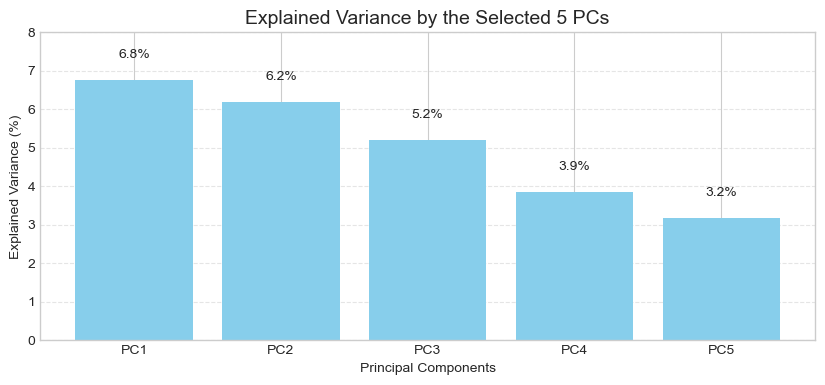


Total preserved explained variance by the 5 PCs: 25.17%


In [ ]:
#       3.2 Visualize as a barplot the explained variance (as percentage) for each PC,
#       and report the preserved explained variance (as percentage) by the $m$ PCs.

m_variances = pca_pp.explained_variance_ratio_[:m] * 100 
pc_labels = [f'PC{i+1}' for i in range(m)]
# 4. Visualization: Bar Plot
plt.figure(figsize=(10, 4))
bars = plt.bar(pc_labels, m_variances, color='skyblue')

# Add text labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom')

plt.title(f'Explained Variance by the Selected {m} PCs', fontsize=14)
plt.ylabel('Explained Variance (%)')
plt.xlabel('Principal Components')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, 8)
plt.show()

# 5. Report Preserved Variance
total_preserved = np.sum(m_variances)
print(f"\nTotal preserved explained variance by the {m} PCs: {total_preserved:.2f}%")

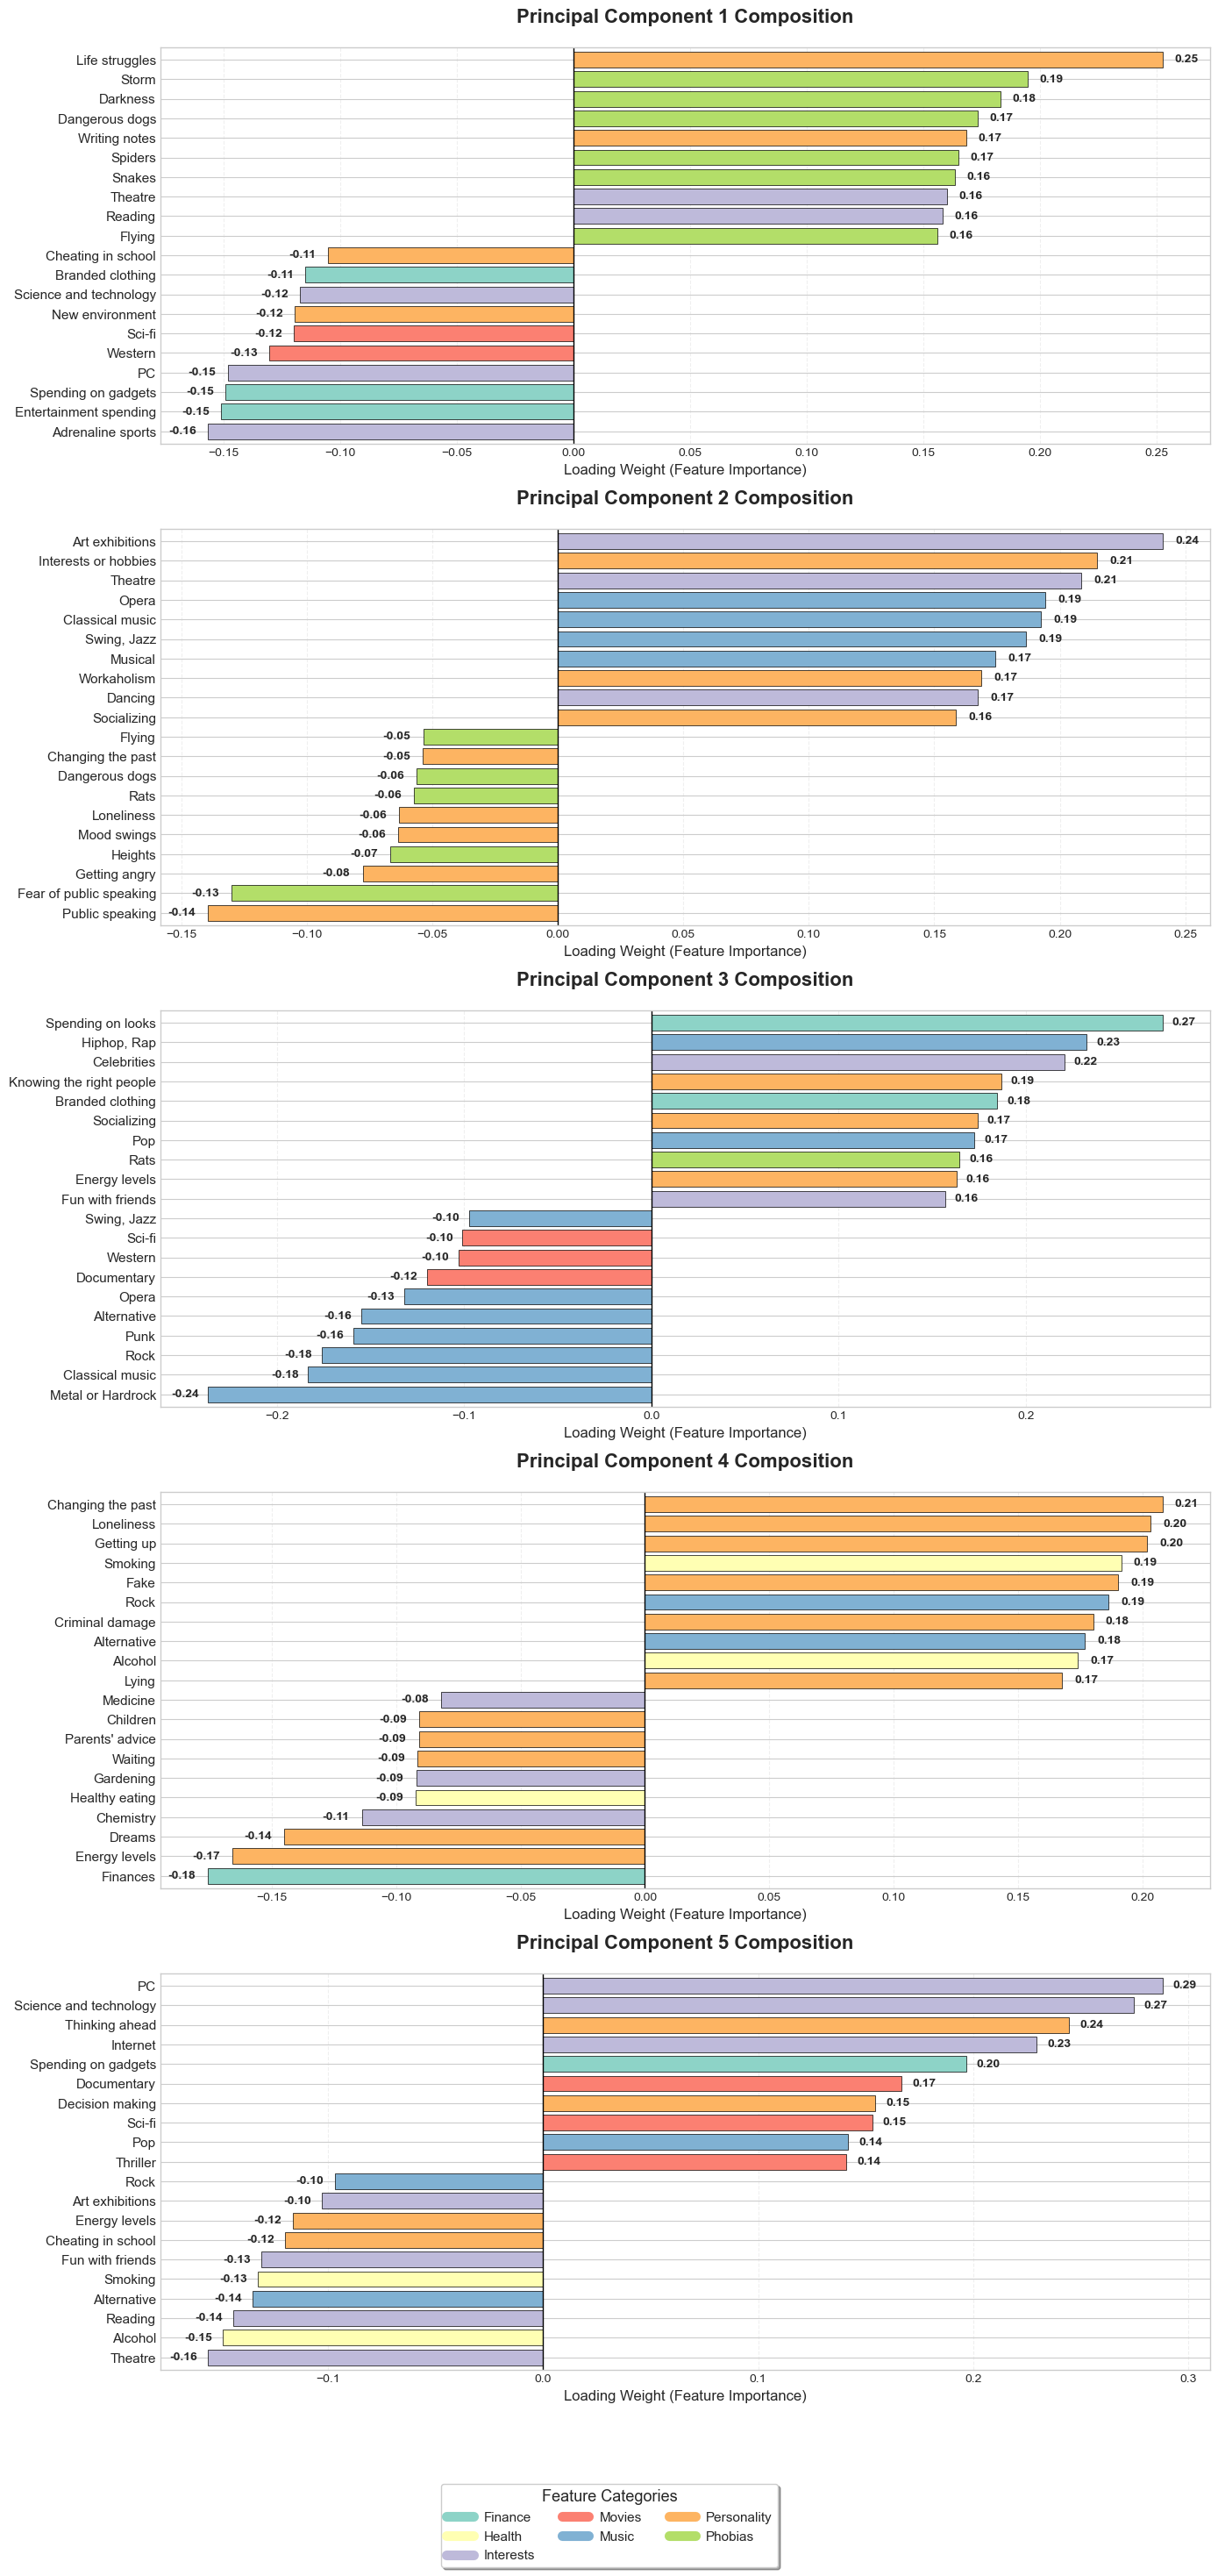

In [ ]:
#       3.3 Visualize all the PCs as barplots and give an 
#       interpretation and a name to them, **motivating your choices**.

pcs = pca_reduced.components_[:m]
feature_names = responses_ft_pp.columns

def plot_pcs(pcs, features, m, filtered_vars, custom_palette):

    unique_cats = list(filtered_vars.keys())
    cat_colors = {cat: custom_palette[i % len(custom_palette)] for i, cat in enumerate(unique_cats)}
    col_to_cat = {col: cat for cat, cols in filtered_vars.items() for col in cols}
    

    fig, axes = plt.subplots(m, 1, figsize=(14, 6 * m))
    if m == 1: axes = [axes]
    
    for i in range(m):
        pc_loadings = pd.Series(pcs[i], index=features)
        
        pc_loadings = pc_loadings[pc_loadings.index.isin(col_to_cat.keys())]
        
        sorted_loadings = pc_loadings.sort_values()
        top_features = pd.concat([sorted_loadings.head(m + 5), sorted_loadings.tail(m + 5)])
        
        bar_colors = [cat_colors.get(col_to_cat.get(col), '#d9d9d9') for col in top_features.index]
        ax = axes[i]

        top_features.plot(kind='barh', ax=ax, color=bar_colors, width=0.8, edgecolor='black', linewidth=0.5)
        
        ax.set_title(f'Principal Component {i+1} Composition', fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Loading Weight (Feature Importance)', fontsize=12)
        ax.axvline(0, color='black', linewidth=1)
        ax.grid(axis='x', linestyle='--', alpha=0.3)

        for index, value in enumerate(top_features.values):

            ha_val = 'left' if value > 0 else 'right'
            offset = 0.005 if value > 0 else -0.005
            ax.text(value + offset, index, f'{value:.2f}', 
                    va='center', ha=ha_val, fontsize=10, fontweight='bold')

        ax.tick_params(axis='y', labelsize=11)


    legend_elements = [Line2D([0], [0], color=cat_colors[cat], lw=8, label=cat) for cat in unique_cats]
    fig.legend(handles=legend_elements, loc='lower center', ncol=3, 
               bbox_to_anchor=(0.5, 0.02), title="Feature Categories", 
               title_fontsize='13', fontsize='11', frameon=True, shadow=True)

    plt.tight_layout(rect=[0, 0.08, 1, 1]) 
    plt.show()


plot_pcs(pcs, feature_names, m, filtered_vars, custom_palette)

#### For each PC, write the name you assigned to it and a brief interpretation that motivate the choice (max 100 words per PC):

- **PC1**: Fear and Anxiety vs. Sensation-Seeking,
    - High Score: Correlates with Anxiety, Fobias (e.g., life struggles, snakes, flying) (up to $0.25$).
    - Low Score: Correlates with Rationality, Risk-Taking (e.g., adrenaline sports, science and technology, cheating in school) (down to $-0.15$)
- **PC2**: Culture and Arts vs. Social Inhibition
    - High Score: Interest in Classical/High Arts (e.g., theatre, opera, jazz, art exhibitions) (up to $0.24$).
    - Low Score: Associated with Social Fears (e.g., fear of public speaking, mood swings) (down to $-0.13$).
- **PC3**: Mainstream & Status vs. Alternative Subculture
    - High Score: Focus on Trendy, Mainstream Pop Culture, and Image (e.g., hip-hop, Pop, socializing, shopping) (up to $0.27$).
    - Low Score: Interest in Alternative Rock Music Genres (e.g., Metal or Hardrock, Punk, Alternative) (down to $-0.24$).
- **PC4**: Stability & Health vs. Distress & Trouble
    - High Score: Represents Stability and Healthy Lifestyle (e.g., healthy eating, finances, parents' advice) (up to $0.20$).
    - Low Score: Represents Emotional Distress and Problematic Behavior (e.g., criminal damage, sadness, changing the past) (down to $-0.17$).
- **PC5**: Technology & Science vs. Traditional Arts
    - High Score: Focus on Technology and Rational Media (e.g., science and technology, Internet, Documentary) (up to $0.29$).
    - Low Score: Associated with Traditional Arts (e.g., Theatre, Art exhibitions) and cheating in school (down to $-0.16$).

In [61]:
#       3.4 Transform the *responses_ft_pp* data into their $m$-dimensional 
#       representation via PCA. Store the transformed data in the 
#       variable *responses_ft_pca*;

responses_ft_pca = pca_reduced.fit_transform(responses_ft_pp)

print(f"Original dimension: {responses_ft_pp.shape}")
print(f"Reduced dimensio : {responses_ft_pca.shape}")

Original dimension: (506, 93)
Reduced dimensio : (506, 5)


#### Write the code for visualizing the score graph (with PC names on the axis):

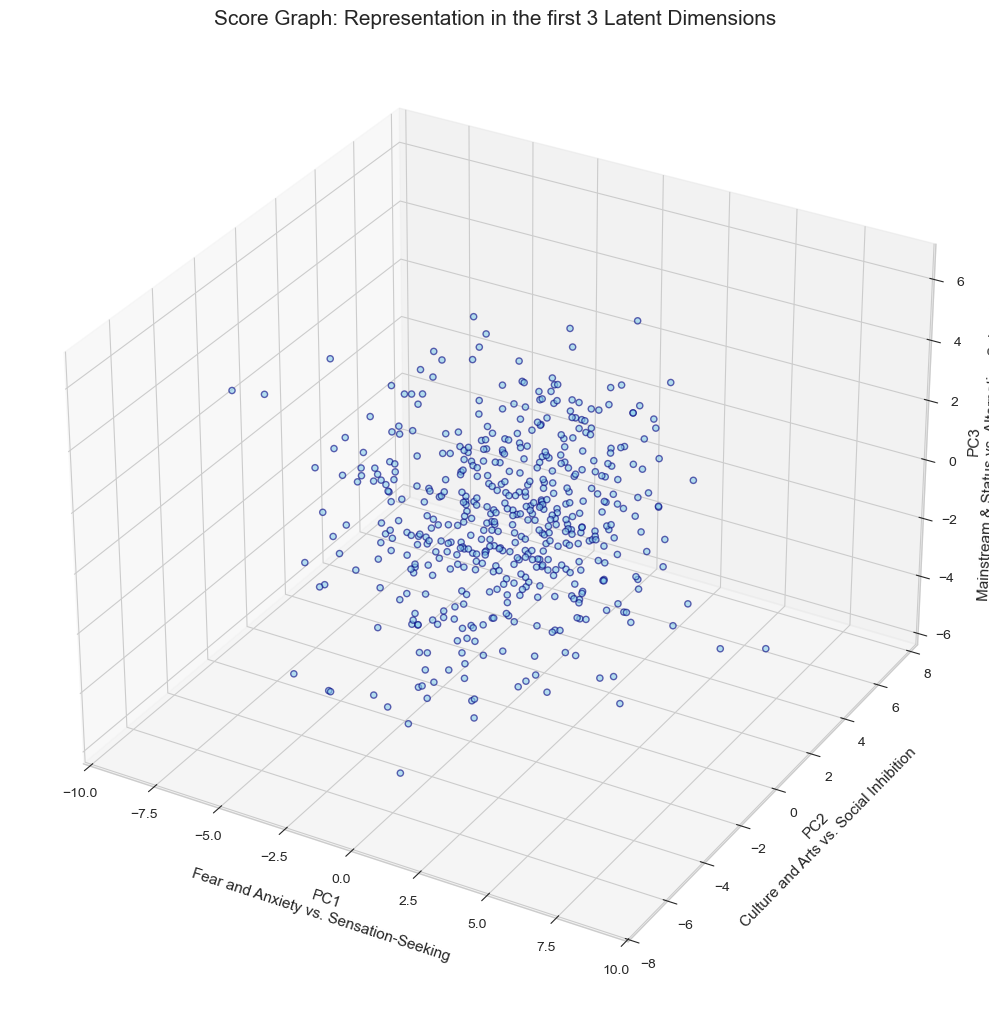

In [96]:
pc_names = [
    "Fear and Anxiety vs. Sensation-Seeking",           # PC1
    "Culture and Arts vs. Social Inhibition",           # PC2
    "Mainstream & Status vs. Alternative Subculture",   # PC3
    "Stability & Health vs. Distress & Trouble",        # PC4
    "Technology & Science vs. Traditional Arts"         # PC5
]

fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')
ax.dist = 13

xs = responses_ft_pca[:, 0]
ys = responses_ft_pca[:, 1]
zs = responses_ft_pca[:, 2]

scatter = ax.scatter(xs, ys, zs, c='skyblue', edgecolor='navy', s=20, alpha=0.6)

ax.set_xlabel(f"\nPC1\n{pc_names[0]}", fontsize=11) 
ax.set_ylabel(f"\nPC2\n{pc_names[1]}", fontsize=11)
ax.set_zlabel(f"PC3\n{pc_names[2]}", fontsize=11)
ax.set_title('Score Graph: Representation in the first 3 Latent Dimensions', fontsize=15)

plt.tight_layout()

plt.show()

## Exercise 4. $k$-Means

In this exercise, you have to do the following operations:
1. Run the $k$-Means for clustering the data of *responses_ft_pca*, **setting the input argument *random_state* equal to the variable *random_seed*** (i.e., the minimum of the Student IDs).

   In particular, **use the silohuette score for identifying the best value for $k\in\{3, \ldots, 10\}$** and show it by plotting how the score changes w.r.t. $k$.
1. Plot the score graph again, but add the centroids of the cluster and color the points according to their cluster.
1. Visualize the centroids coordinates as barplots and **give a name and an interpretation to them by exploiting the PC names**.


#### Write the code for performing the items of the list above:

Optimal number of clusters (k): 4


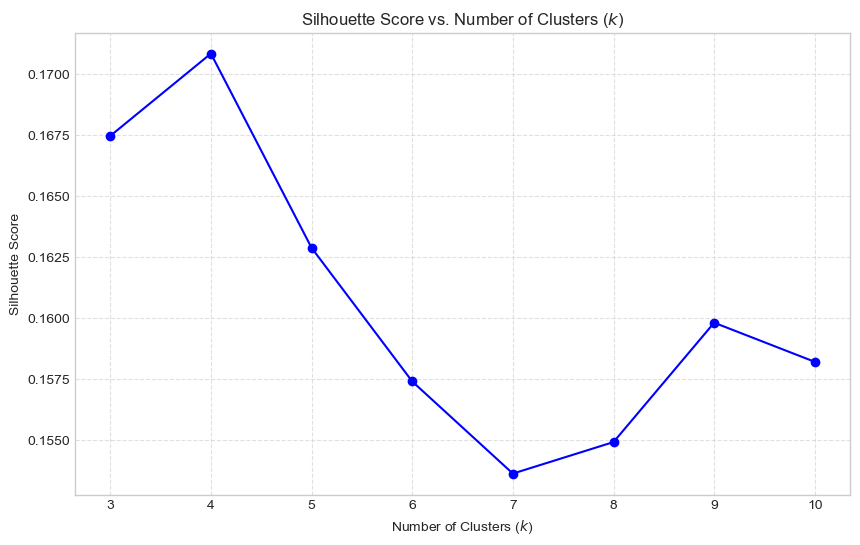

In [ ]:
#       1. Run the $k$-Means for clustering the data of *responses_ft_pca*, 
#       **setting the input argument *random_state* equal to the variable
#       *random_seed*** (i.e., the minimum of the Student IDs).

silhouette_scores = []
k_values = range(3, 11)  # k from 3 to 10

# Calculate Silhouette Score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_seed, n_init=10)
    labels = kmeans.fit_predict(responses_ft_pca)
    
    score = silhouette_score(responses_ft_pca, labels)
    silhouette_scores.append(score)

# SILHOUETTE SCORE IS THE RESULT OF THIS FORMULA: 
#           (b - a)/max(a,b)
# where a is the distance from the point to all the other points in the same cluster: cohesion
# and b is the avg distance of the point to all the points in the nearest neighbour cluster: separation

# Find the best k (highest score)
best_k_idx = np.argmax(silhouette_scores)
best_k = k_values[best_k_idx]

print(f"Optimal number of clusters (k): {best_k}")

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs. Number of Clusters ($k$)')
plt.xlabel('Number of Clusters ($k$)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

/var/folders/j9/m1q0h7955ls67lg17_lw___80000gn/T/ipykernel_33906/2034363902.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


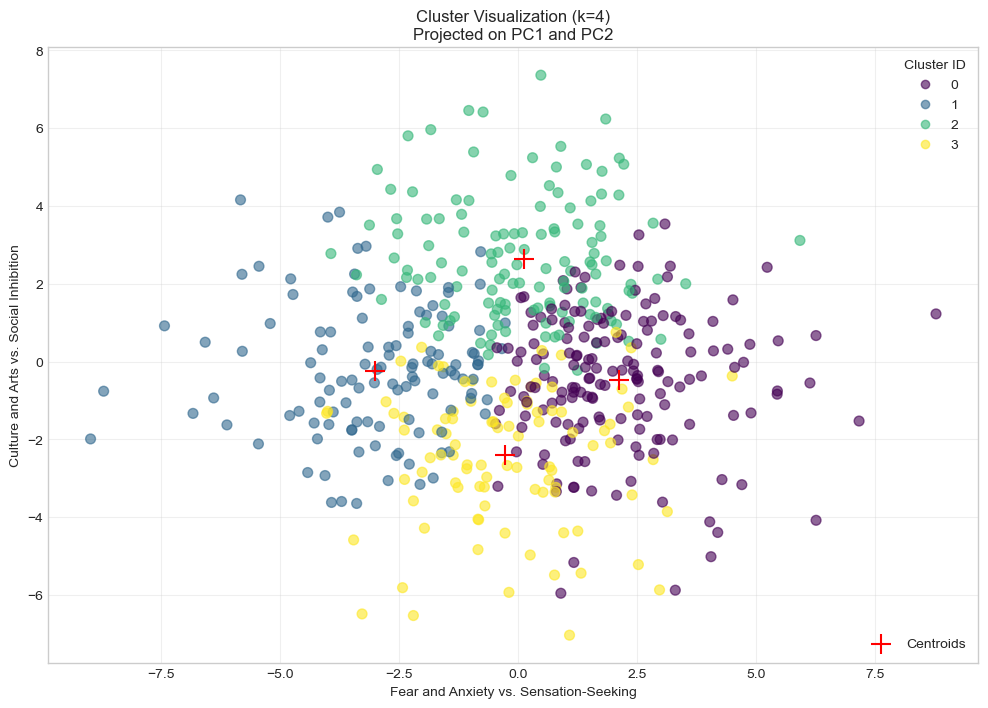

In [48]:
# Run k-Means with the best k
kmeans_final = KMeans(n_clusters=best_k, random_state=random_seed, n_init=10)
cluster_labels = kmeans_final.fit_predict(responses_ft_pca)
centroids = kmeans_final.cluster_centers_

plt.figure(figsize=(12, 8))

# Scatter plot: PC1 (column 0) vs PC2 (column 1)
scatter = plt.scatter(
    responses_ft_pca[:, 0], 
    responses_ft_pca[:, 1], 
    c=cluster_labels, 
    cmap='viridis', 
    s=50, 
    alpha=0.6
)


plt.scatter(
    centroids[:, 0], centroids[:, 1], 
    c='red', marker='+', s=200, edgecolors='black', linewidth=1.5, label='Centroids'
)

legend1 = plt.legend(*scatter.legend_elements(), title="Cluster ID", loc="upper right")
plt.gca().add_artist(legend1)
plt.legend(loc='lower right') # Legend for centroids

plt.title(f'Cluster Visualization (k={best_k})\nProjected on PC1 and PC2')
plt.xlabel(pc_names[0])
plt.ylabel(pc_names[1])
plt.grid(True, alpha=0.3)
plt.show()

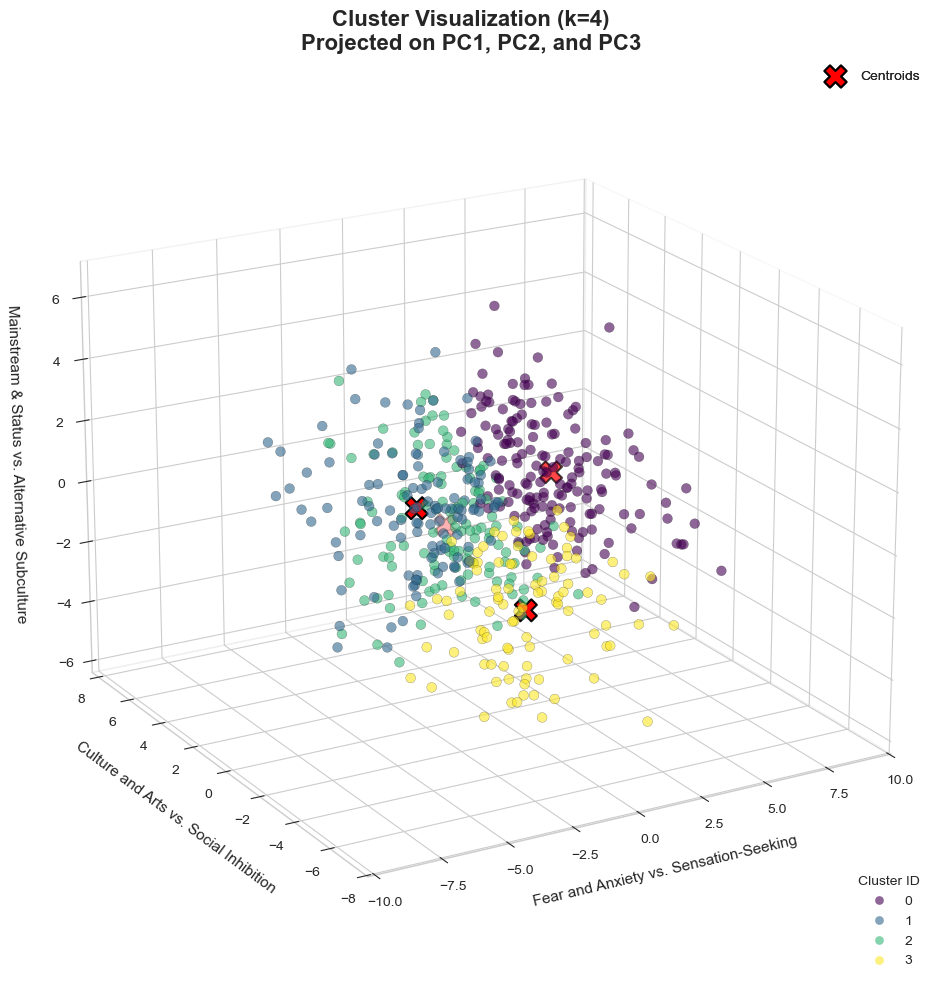

In [49]:

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')


xs = responses_ft_pca[:, 0] # PC1
ys = responses_ft_pca[:, 1] # PC2
zs = responses_ft_pca[:, 2] # PC3

scatter = ax.scatter(
    xs, ys, zs,
    c=cluster_labels,         
    cmap='viridis',
    s=50,
    alpha=0.6,
    edgecolor='k',             
    linewidth=0.2
)


ax.scatter(
    centroids[:, 0],           # PC1
    centroids[:, 1],           # PC2
    centroids[:, 2],           # PC3
    c='red',
    marker='X',                
    s=250,                     
    edgecolors='black',
    linewidth=1.5,
    label='Centroids'
)


ax.set_title(f'Cluster Visualization (k={best_k})\nProjected on PC1, PC2, and PC3', fontsize=16, fontweight='bold')
ax.set_xlabel(pc_names[0], fontsize=11, labelpad=10)
ax.set_ylabel(pc_names[1], fontsize=11, labelpad=10)
ax.set_zlabel(pc_names[2], fontsize=11, labelpad=10)

# --- Legend ---
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster ID", loc="lower right")
ax.add_artist(legend1)

legend2 = ax.legend(loc='upper right')
ax.add_artist(legend2)


ax.view_init(elev=20, azim=-120) 
ax.grid(True, alpha=0.3)
ax.xaxis.pane.fill = False 
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.tight_layout()
#plt.show()

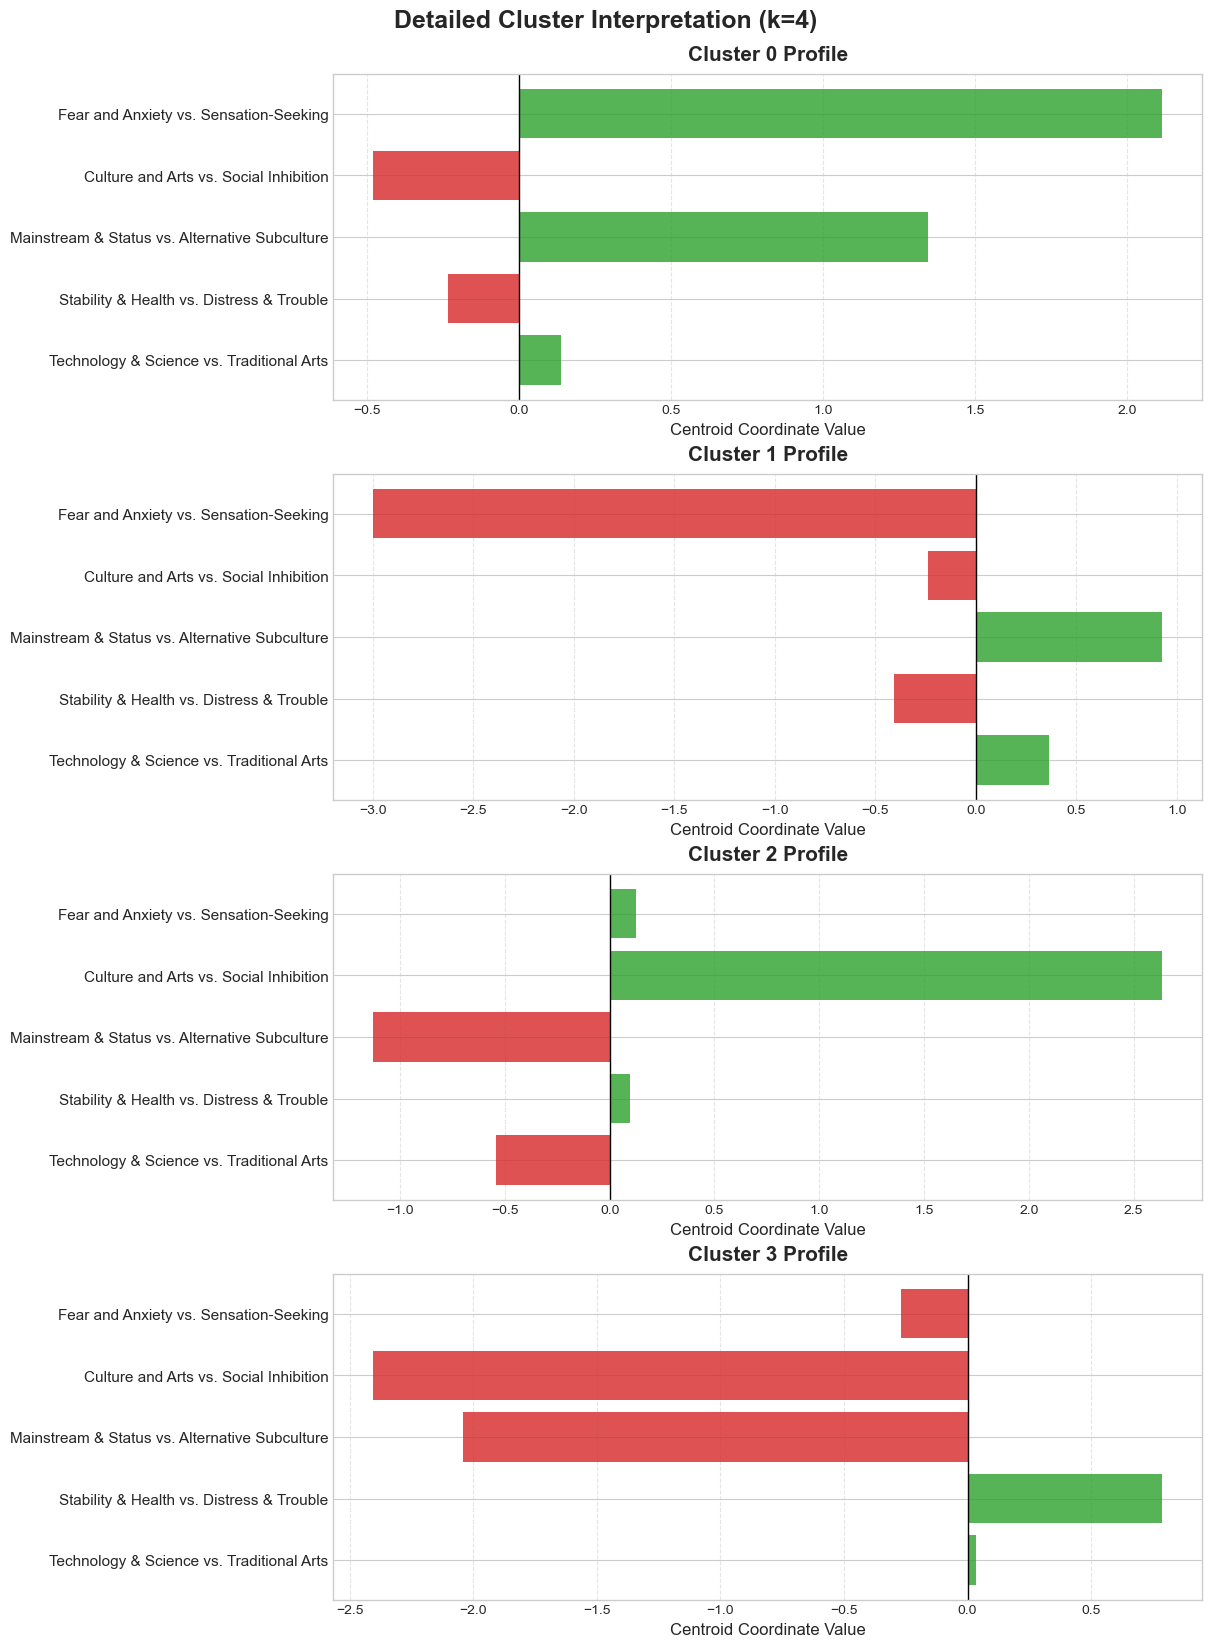

In [50]:
num_features = centroids.shape[1]

full_pc_labels = []
for i in range(num_features):
    if i < len(pc_names):
        full_pc_labels.append(pc_names[i])
    else:
        full_pc_labels.append(f"PC{i+1}")

n_cols = 1
n_rows = best_k

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows), constrained_layout=True)

if best_k == 1:
    axes = [axes]

for i in range(best_k):
    values = centroids[i]
    colors = ['#2ca02c' if x >= 0 else '#d62728' for x in values]
    
    axes[i].barh(full_pc_labels, values, color=colors, alpha=0.8)
    
    axes[i].axvline(0, color='black', linewidth=1, linestyle='-')
    axes[i].set_title(f'Cluster {i} Profile', fontsize=15, fontweight='bold', pad=10)
    axes[i].set_xlabel('Centroid Coordinate Value', fontsize=12)
    
    axes[i].invert_yaxis()
    
    axes[i].grid(axis='x', linestyle='--', alpha=0.5)
    
    axes[i].tick_params(axis='y', labelsize=11)

plt.suptitle(f'Detailed Cluster Interpretation (k={best_k})', fontsize=18, fontweight='bold', y=1.02)
plt.show()

#### For each Centroid, write the name you assigned to it and a brief interpretation that motivate the choice by exploiting the PC names(max 100 words per centroid):

### Cluster Interpretation

#### Cluster 0: The Anxious Conformist
These guys have **high Fear/Anxiety (PC1)** and really like **Mainstream stuff (PC3)**. Their **Stability (PC4)** and **Culture (PC2)** scores are low. Basically, they seem pretty insecure and stressed out, so they stick to popular trends to feel safe instead of doing their own thing.

#### Cluster 1: The Reckless Hedonist
This group has super **low Fear (PC1)**, which means they are adrenaline junkies. They also have **low Stability (PC4)** but like **Mainstream stuff (PC3)**. These are your impulsive party types: they like pop culture and fun, but they take a lot of risks and can get into trouble easily.

#### Cluster 2: The Cultured Intellectual
This cluster is all about **Culture and Arts (High PC2)**. They hate **Mainstream trends (Low PC3)** and prefer **Traditional Art over Tech (Low PC5)**. These are the "fancy" artsy people—they like theatre and museums, dislike pop culture, and aren't really into modern technology.

#### Cluster 3: The Stable Alternative
This is the "lone wolf" group. They are **socially withdrawn (Low PC2)** and like **Alternative stuff (Low PC3)** (like metal or punk), so they don't fit in with the artsy or pop crowds. Surprisingly, they have the highest **Stability (High PC4)**. They are introverted and keep to themselves, but they are actually the most rational and mentally healthy group.

In [51]:
cluster_names = [
    "The Anxious Conformist",
    "The Reckless Hedonist",
    "The Cultured Intellectual",
    "The Stable Alternative"
]

## Exercise 5. Cluster External Evaluations

In this exercise, you have to do the following operations:
1. Select a subset meaningful labels for performing an external evaluation of the clustering results.
1. For each selected label, visualize the distribution of the label in each cluster and in the whole dataset.
1. Visualize the score graph with dots colored with respect to the label value; then, visualize the clusters in separated score-graphs, coloring the points according to the label values.

#### List the Labels you consider meaningful for an external cluster evaluation and motivate your choice (max 50 words per label):



#### Write the code for the visualizations cited in item 2 above:

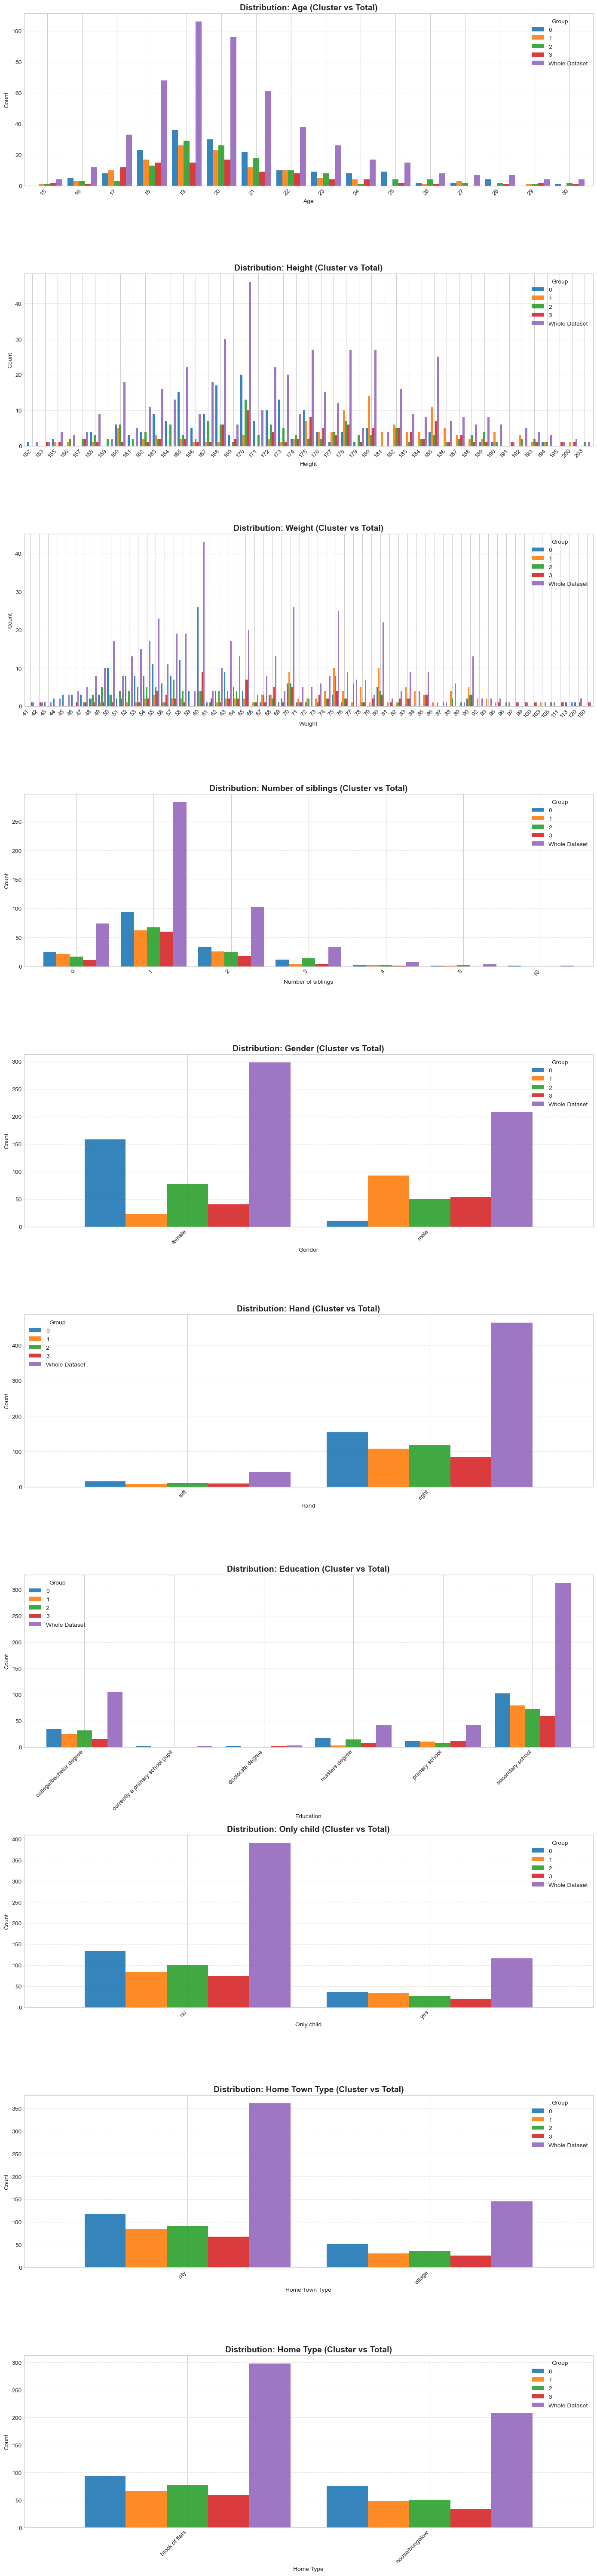

In [52]:
all_labels = responses_lb.columns

n_rows = len(all_labels)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(14, 6 * n_rows))

if n_rows == 1:
    axes = [axes]


for i, col_name in enumerate(all_labels):
    ax = axes[i]
    
    # --- STEP A: Crosstab for Clusters ---
    ct = pd.crosstab(responses_lb[col_name], cluster_labels)
    
    total_counts = responses_lb[col_name].value_counts().sort_index()
    
    ct['Whole Dataset'] = total_counts
    
    # --- STEP C: Plotting ---
    ct.plot(kind='bar', ax=ax, width=0.85, alpha=0.9)
    
    ax.set_title(f"Distribution: {col_name} (Cluster vs Total)", fontsize=14, fontweight='bold')
    ax.set_ylabel("Count")
    ax.set_xlabel(col_name)
    
    ax.legend(title='Group', loc='best')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [53]:

labels_subset = responses_lb.columns
responses_lb_enc = responses_lb

## Preprocessing labels 

# Gender label
categories_order = [['female',
                     'male']]
oe = OrdinalEncoder(categories=categories_order)
responses_lb_enc['Gender'] = oe.fit_transform(responses_lb_enc[['Gender']])

# Hand label
categories_order = [['right', 
                     'left']]
oe = OrdinalEncoder(categories=categories_order)
responses_lb_enc['Hand'] = oe.fit_transform(responses_lb_enc[['Hand']])

# Education label
categories_order = [['currently a primary school pupil',
                     'primary school',
                     'secondary school', 
                     'college/bachelor degree', 
                     'masters degree',
                     'doctorate degree']]
oe = OrdinalEncoder(categories=categories_order)
responses_lb_enc['Education'] = oe.fit_transform(responses_lb_enc[['Education']])

# Only child label
categories_order = [['no',
                     'yes']]
oe = OrdinalEncoder(categories=categories_order)
responses_lb_enc['Only child'] = oe.fit_transform(responses_lb_enc[['Only child']])

# Home Town Type label
categories_order = [['city',
                     'village']]
oe = OrdinalEncoder(categories=categories_order)
responses_lb_enc['Home Town Type'] = oe.fit_transform(responses_lb_enc[['Home Town Type']])

# Home Type label
categories_order = [['block of flats',
                     'house/bungalow']]
oe = OrdinalEncoder(categories=categories_order)
responses_lb_enc['Home Type'] = oe.fit_transform(responses_lb_enc[['Home Type']])


In [54]:
responses_lb_pp = scaler.fit_transform(responses_lb_enc)
responses_lb_pp = pd.DataFrame(data=responses_lb_pp, columns=responses_lb_enc.columns)

responses_lb_pp.drop(columns=['Only child', 'Home Town Type','Home Type','Hand', 'Number of siblings'], inplace=True)
print("REMAINING FEATURES :")
print(responses_lb_pp.columns.values)

REMAINING FEATURES :
['Age' 'Height' 'Weight' 'Gender' 'Education']


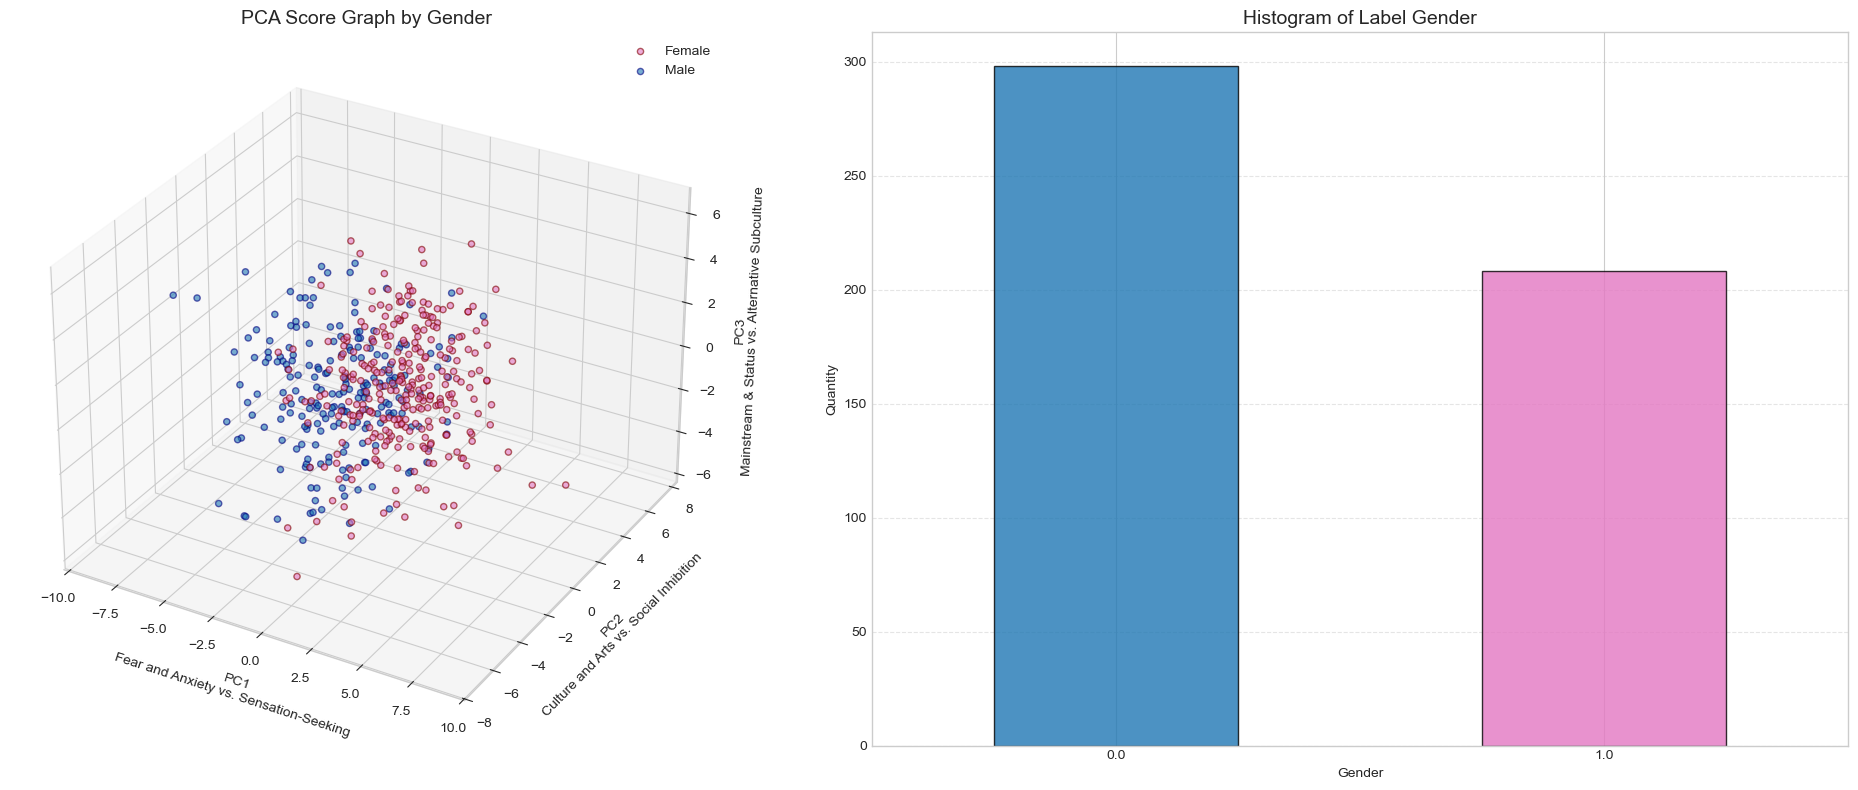

In [55]:
xs = responses_ft_pca[:, 0]
ys = responses_ft_pca[:, 1]
zs = responses_ft_pca[:, 2]

# --- PLOT 1: GENDER ---
fig = plt.figure(figsize=(20, 8))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')

mask_f = (responses_lb_enc['Gender'] == 0.0)
mask_m = (responses_lb_enc['Gender'] == 1.0)

ax1.scatter(xs[mask_f], ys[mask_f], zs[mask_f], c='tab:pink', edgecolor='maroon', s=20, alpha=0.6, label='Female')
ax1.scatter(xs[mask_m], ys[mask_m], zs[mask_m], c='tab:blue', edgecolor='navy', s=20, alpha=0.6, label='Male')

ax1.set_xlabel(f"\nPC1\n{pc_names[0]}", fontsize=10)
ax1.set_ylabel(f"\nPC2\n{pc_names[1]}", fontsize=10)
ax1.set_zlabel(f"\nPC3\n{pc_names[2]}", fontsize=10)
ax1.set_title('PCA Score Graph by Gender', fontsize=14)
ax1.legend()

# --- Right: Barplot ---
ax2 = fig.add_subplot(1, 2, 2)
gender_counts = responses_lb['Gender'].value_counts().sort_index()
colors_bar = ['tab:pink', 'tab:blue'] if gender_counts.index[0] == 'female' else ['tab:blue', 'tab:pink']

gender_counts.plot(kind='bar', ax=ax2, color=colors_bar, edgecolor='black', alpha=0.8)
ax2.set_title('Histogram of Label Gender', fontsize=14)
ax2.set_ylabel('Quantity')
ax2.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

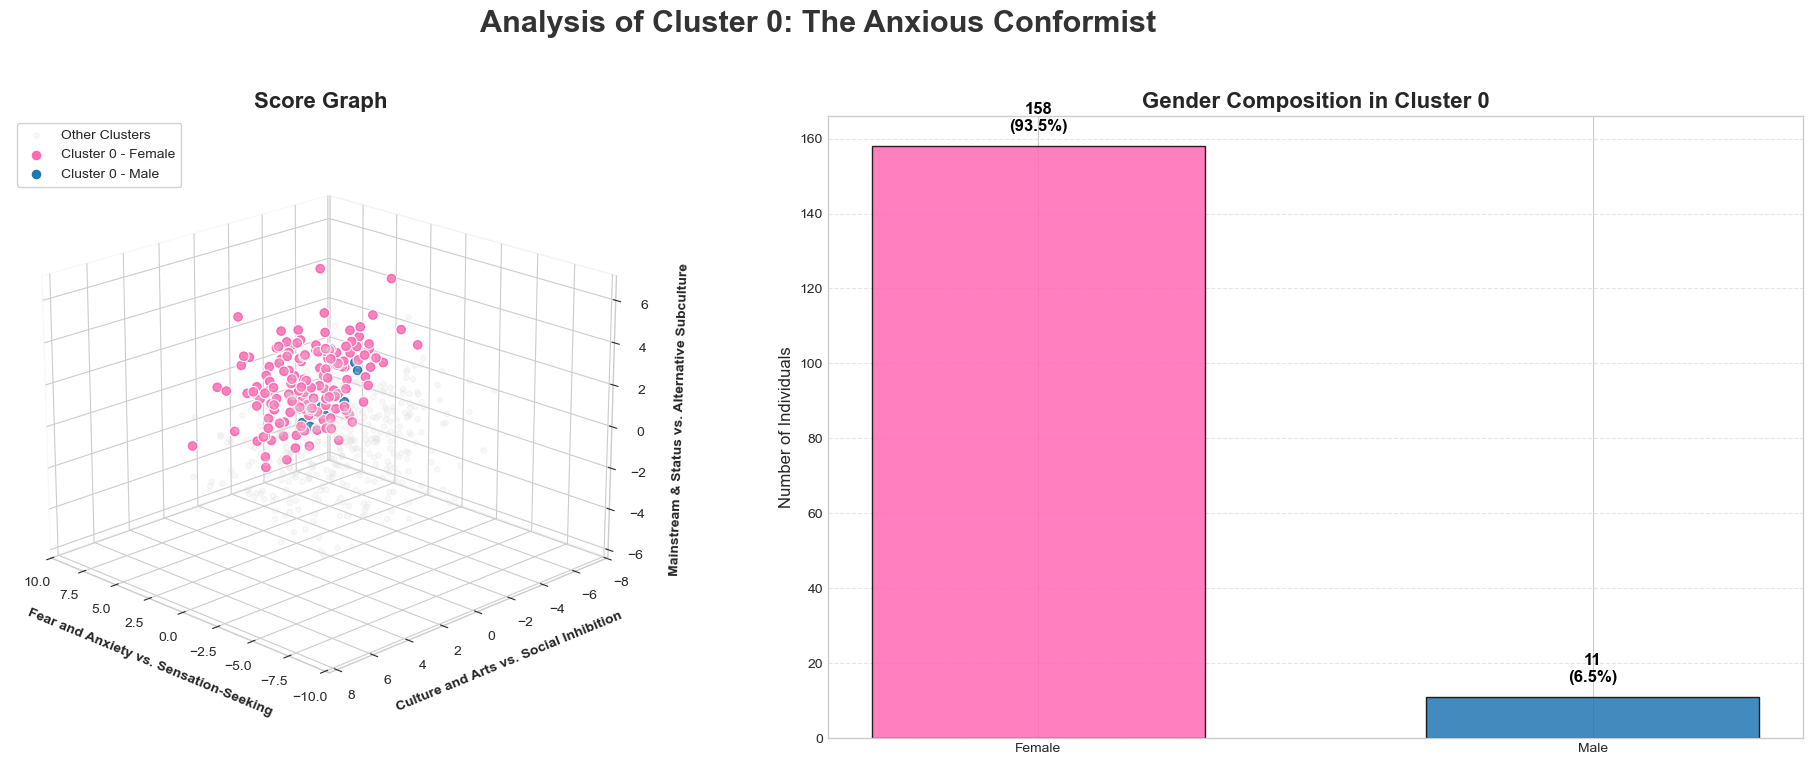

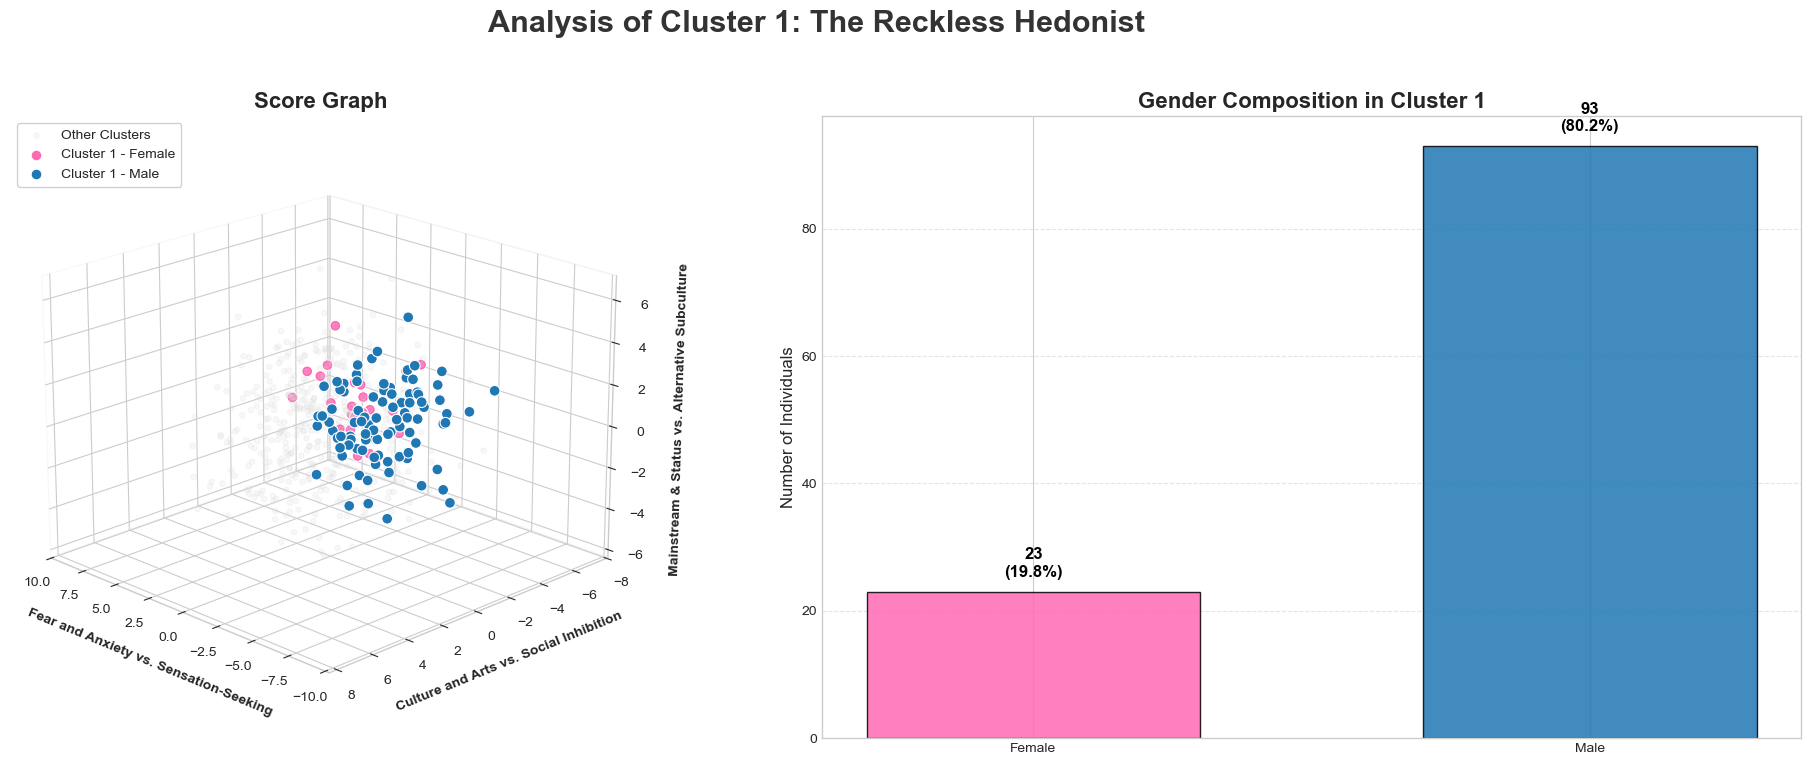

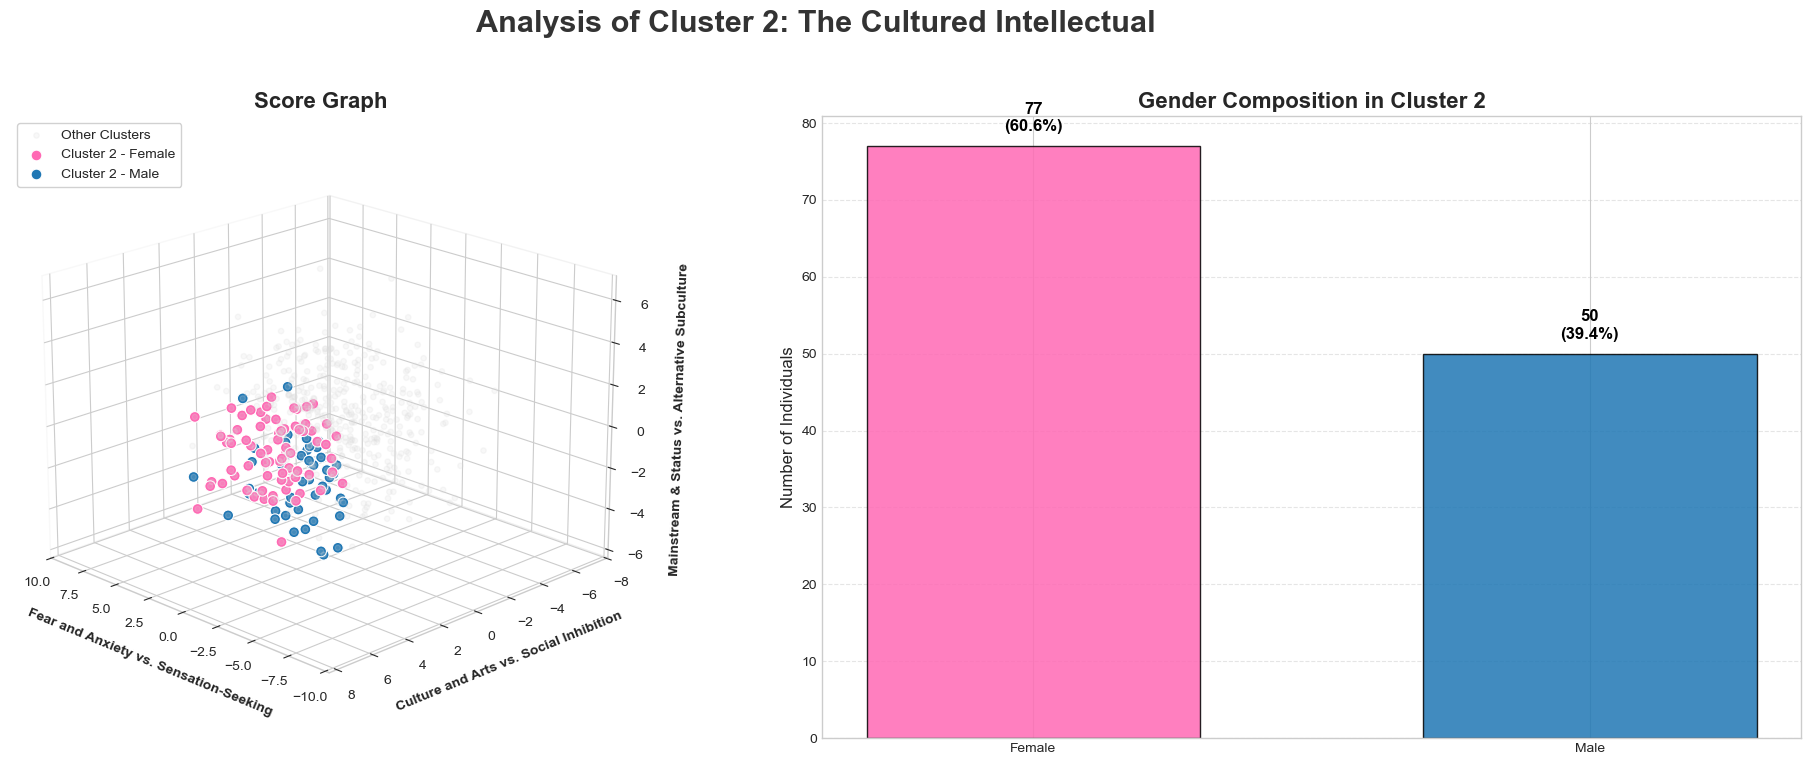

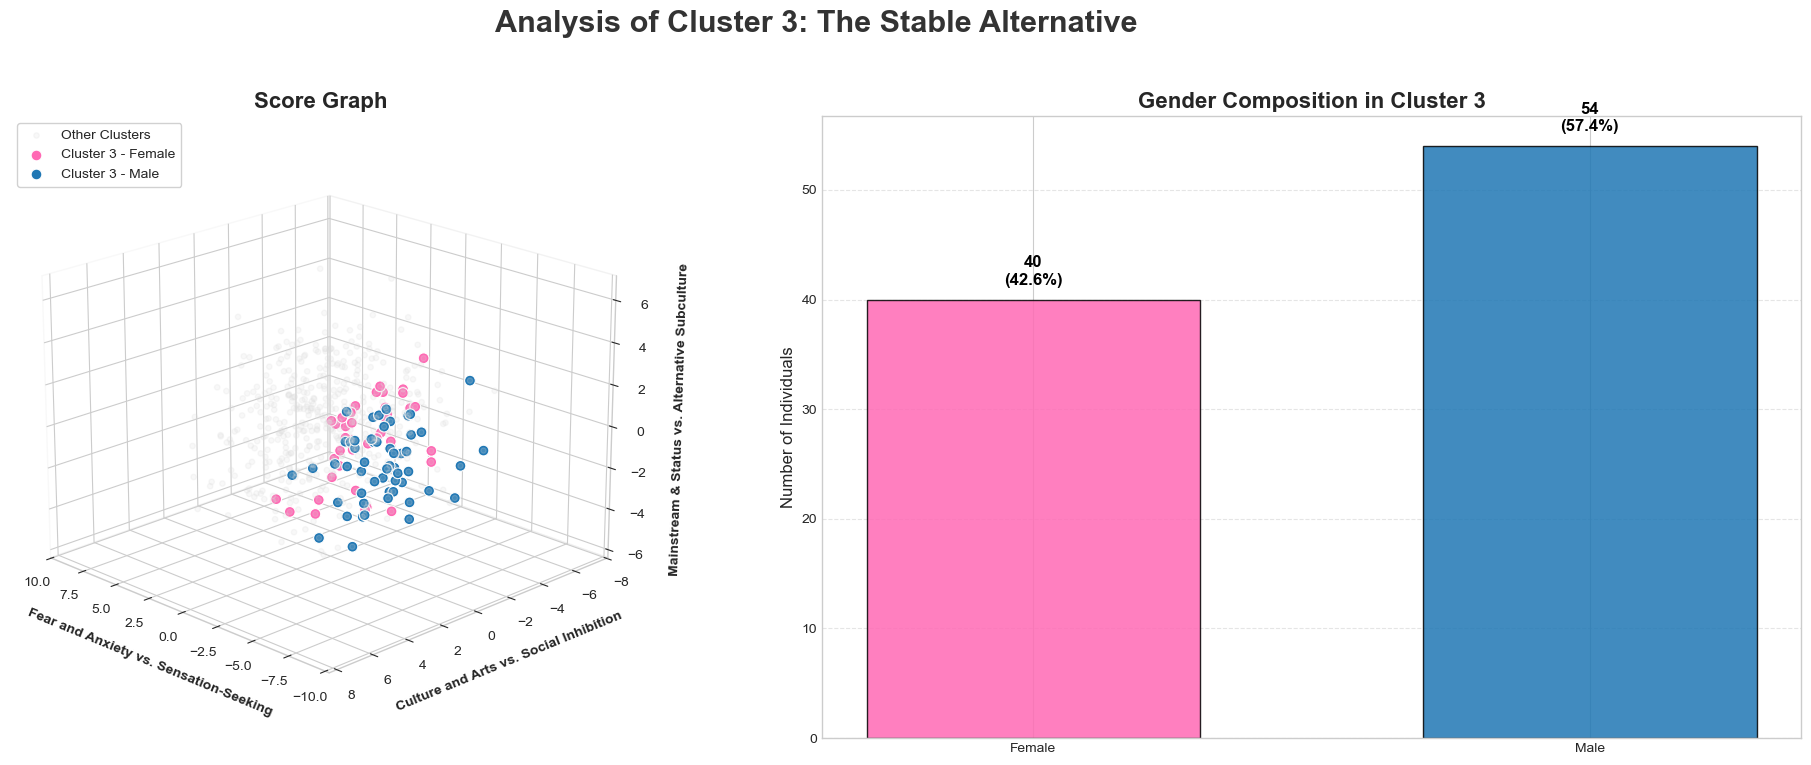

In [56]:
plt.style.use('seaborn-v0_8-whitegrid') # Usa uno stile più pulito se disponibile
labels_array = np.array(cluster_labels)
label_column = 'Gender'

decode_map = {0.0: 'Female', 1.0: 'Male'}
color_map = {'Female': '#ff69b4', 'Male': '#1f77b4'}

xs = responses_ft_pca[:, 0]
ys = responses_ft_pca[:, 1]
zs = responses_ft_pca[:, 2]

unique_clusters = sorted(np.unique(labels_array))

for cluster_id in unique_clusters:
    

    fig = plt.figure(figsize=(20, 8))
    
    fig.suptitle(f'Analysis of Cluster {cluster_id}: {cluster_names[cluster_id]}', fontsize=22, fontweight='bold', color='#333333')
    
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    
    ax1.scatter(xs, ys, zs, c='gainsboro', s=15, alpha=0.2, label='Other Clusters')
    
    mask_cluster = (labels_array == cluster_id)
    
    cluster_genders = responses_lb[label_column].values[mask_cluster]
    cluster_xs = xs[mask_cluster]
    cluster_ys = ys[mask_cluster]
    cluster_zs = zs[mask_cluster]
    
    for val_num, val_str in decode_map.items():
        sub_mask = (cluster_genders == val_num)
        if np.any(sub_mask):
            ax1.scatter(
                cluster_xs[sub_mask], cluster_ys[sub_mask], cluster_zs[sub_mask],
                c=color_map[val_str],
                edgecolor='white', linewidth=0.8, s=60, alpha=1.0, # Punti più grandi e bordati
                label=f'Cluster {cluster_id} - {val_str}'
            )
            
    ax1.set_xlabel(f"\n{pc_names[0]}", fontsize=10, fontweight='bold')
    ax1.set_ylabel(f"\n{pc_names[1]}", fontsize=10, fontweight='bold')
    ax1.set_zlabel(f"\n{pc_names[2]}", fontsize=10, fontweight='bold')
    ax1.set_title('Score Graph', fontsize=16, fontweight='bold')
    
    ax1.xaxis.pane.fill = False
    ax1.yaxis.pane.fill = False
    ax1.zaxis.pane.fill = False
    ax1.grid(True, linestyle='--', alpha=0.3)
    
    ax1.view_init(elev=20, azim=135)
    ax1.legend(loc='upper left', frameon=True, framealpha=0.9)

    ax2 = fig.add_subplot(1, 2, 2)
    
    subset_data = responses_lb.iloc[mask_cluster][label_column]
    counts = subset_data.map(decode_map).value_counts().sort_index()
    
    for gender in ['Female', 'Male']:
        if gender not in counts:
            counts[gender] = 0
            
    counts = counts[['Female', 'Male']]
    
    bar_colors = [color_map[idx] for idx in counts.index]
    
    bars = ax2.bar(counts.index, counts.values, color=bar_colors, edgecolor='black', alpha=0.85, width=0.6)
    
    ax2.set_title(f'Gender Composition in Cluster {cluster_id}', fontsize=16, fontweight='bold')
    ax2.set_ylabel('Number of Individuals', fontsize=12)
    ax2.grid(axis='y', linestyle='--', alpha=0.5)
    
    total = sum(counts.values)
    for bar in bars:
        height = bar.get_height()
        if total > 0:
            percentage = (height / total) * 100
            ax2.text(bar.get_x() + bar.get_width()/2., height + (max(counts.values)*0.02),
                     f'{int(height)}\n({percentage:.1f}%)',
                     ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
    plt.show()

In [57]:
def plot_continuous_variable(var_name, data_column, cmap_name='viridis'):
    fig = plt.figure(figsize=(20, 8))

    fig.suptitle(f'{var_name} Analysis - Global', fontsize=22, fontweight='bold', color='#333333')


    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    
    scatter = ax1.scatter(xs, ys, zs, c=data_column, cmap=cmap_name, edgecolor='k', linewidth=0.3, s=25, alpha=0.7)
    
    ax1.set_xlabel(f"{pc_names[0]}", fontsize=10)
    ax1.set_ylabel(f"{pc_names[1]}", fontsize=10)
    ax1.set_zlabel(f"{pc_names[2]}", fontsize=10)
    ax1.set_title(f'PCA Score Graph by {var_name}', fontsize=14)
    
    #cbar = plt.colorbar(scatter, ax=ax1, shrink=0.6)
    #cbar.set_label(var_name)

    ax2 = fig.add_subplot(1, 2, 2)
    
    n, bins, patches = ax2.hist(data_column, bins=20, color='skyblue', edgecolor='black', alpha=0.8)
    
    cm = get_cmap(cmap_name)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    col = bin_centers - min(bin_centers)
    col /= max(col)
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))

    ax2.set_title(f'Histogram of {var_name}', fontsize=14)
    ax2.set_xlabel(var_name)
    ax2.set_ylabel('Frequency')
    ax2.grid(axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


/var/folders/j9/m1q0h7955ls67lg17_lw___80000gn/T/ipykernel_33906/920446990.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = get_cmap(cmap_name)


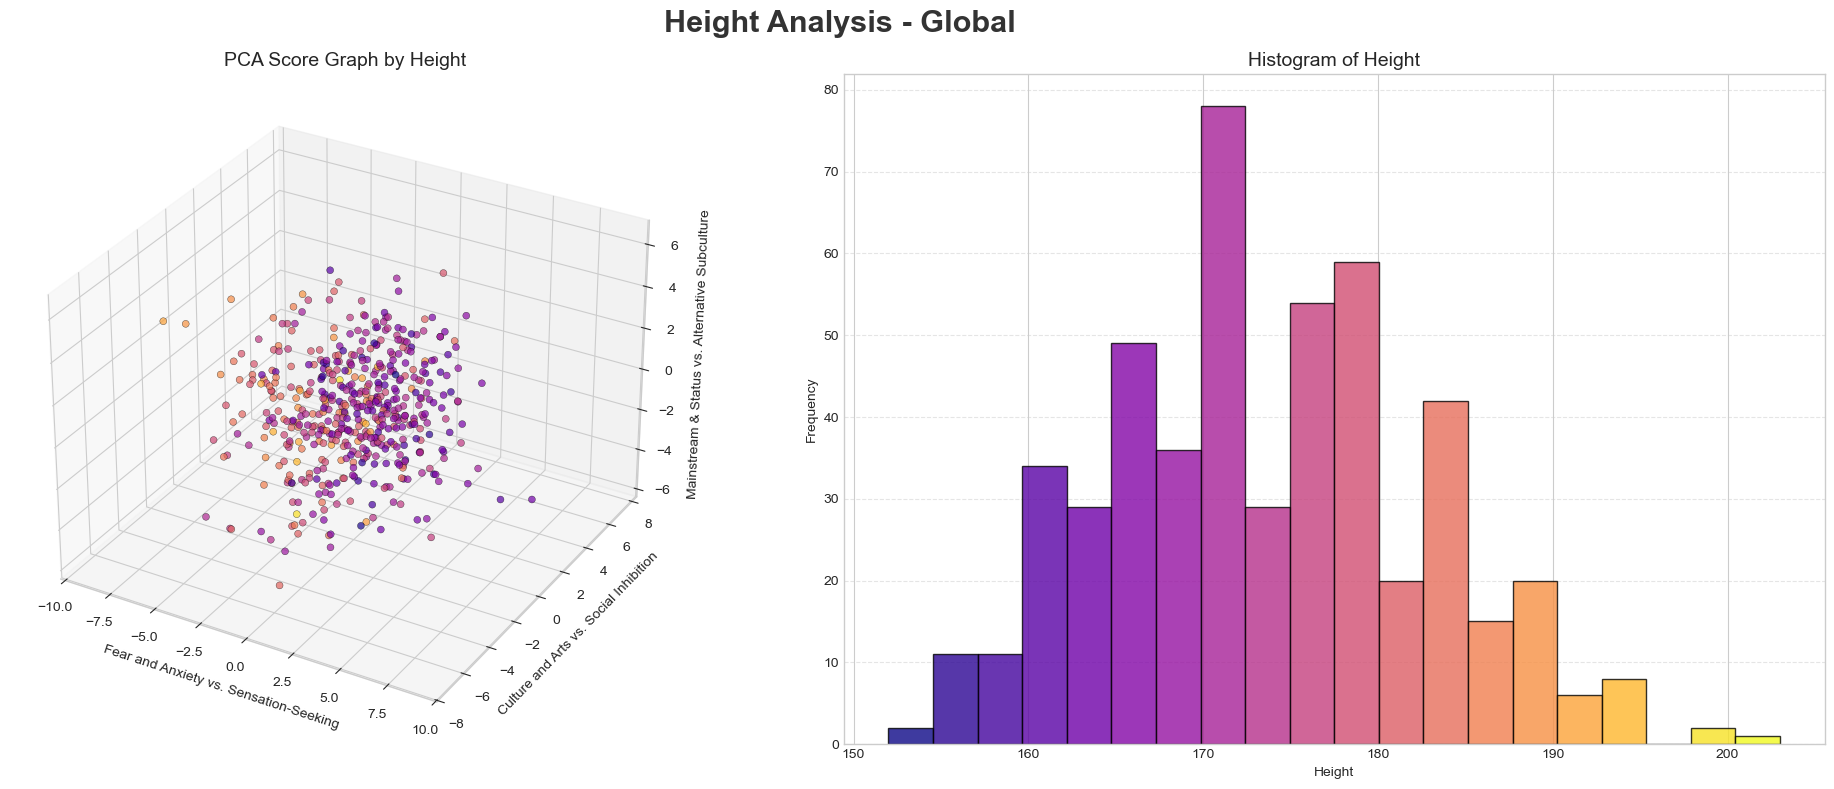

--- ANALYSIS FOR: Height ---


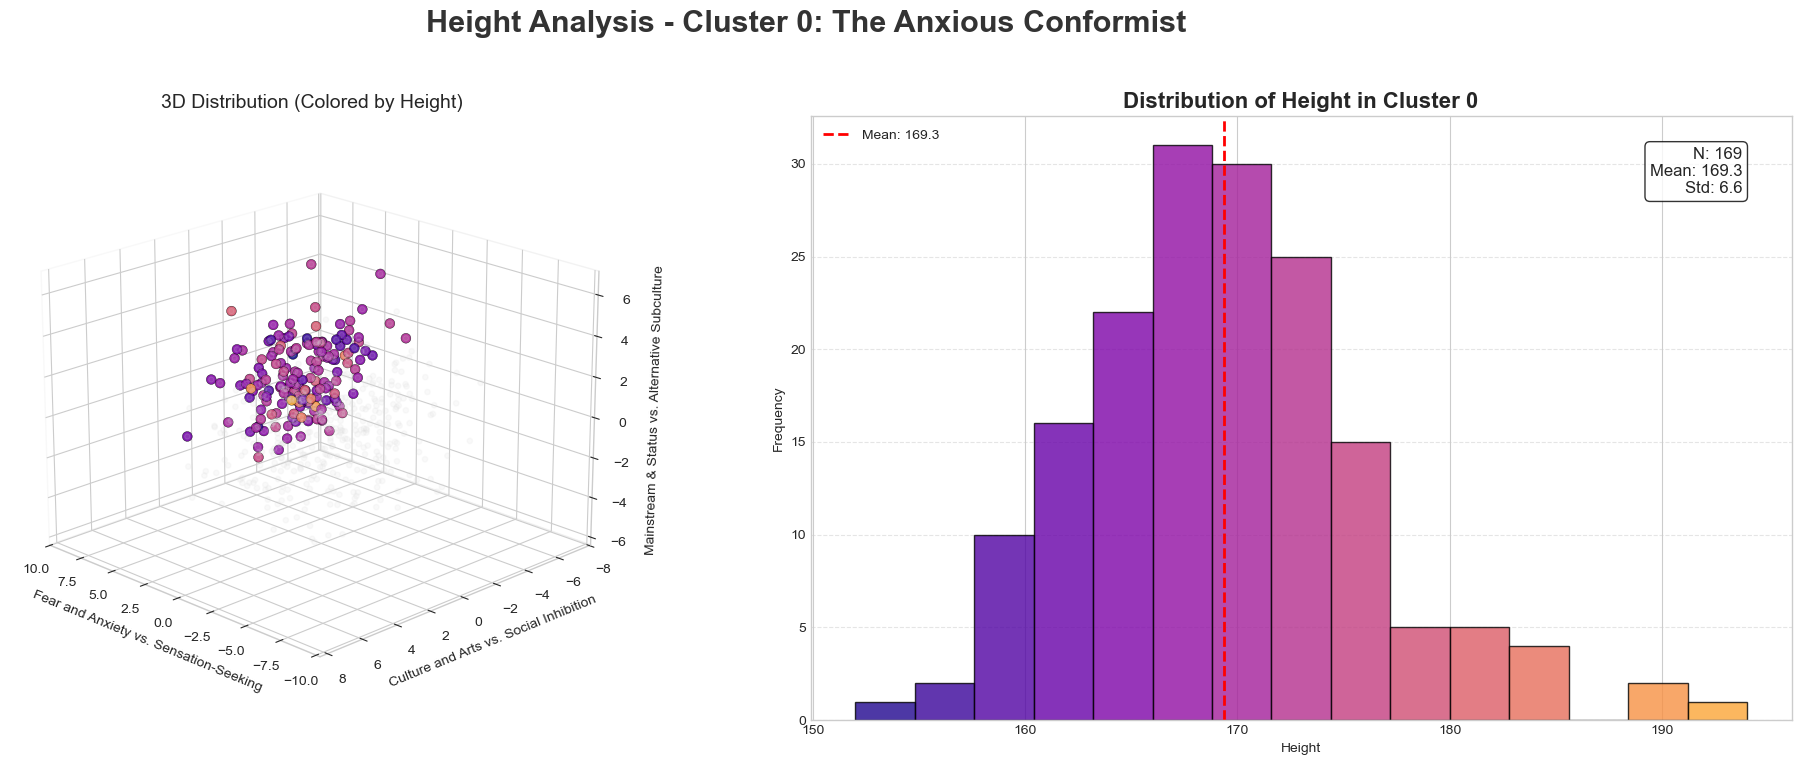

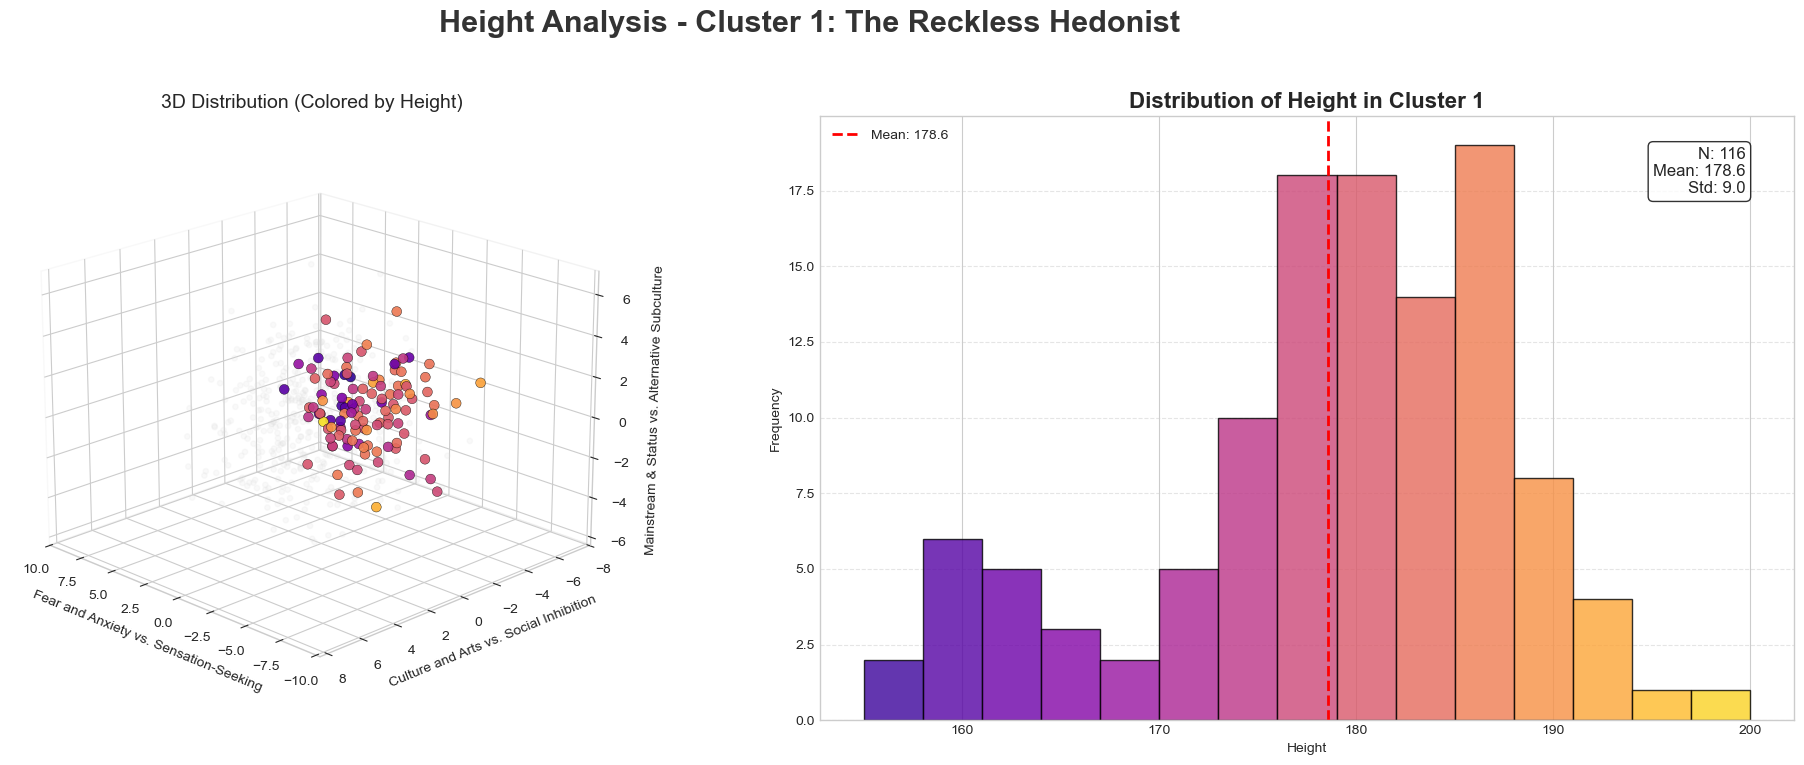

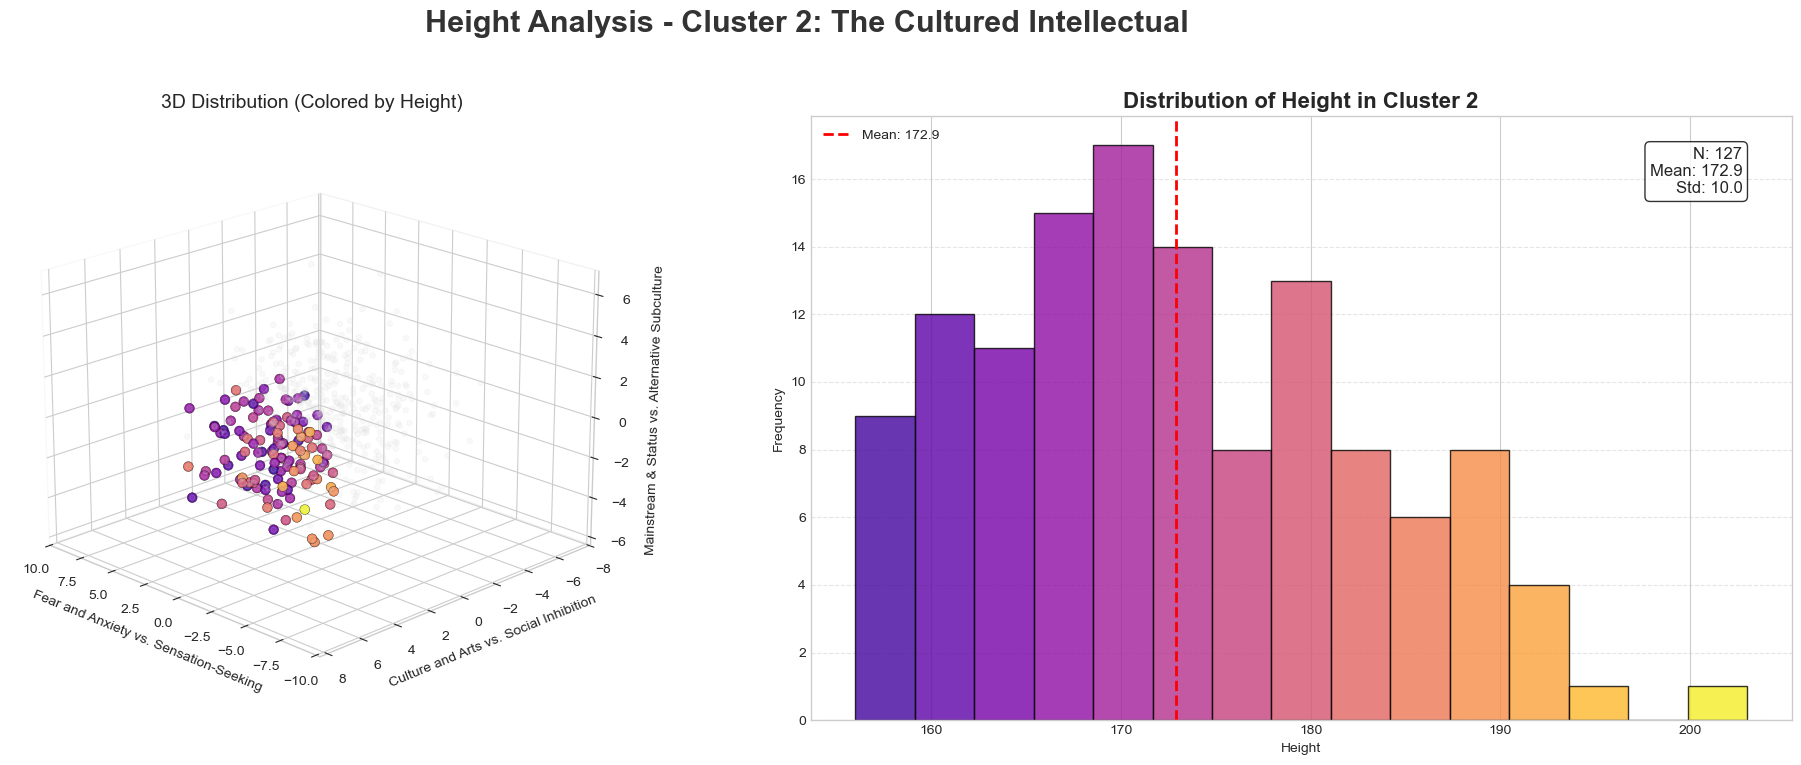

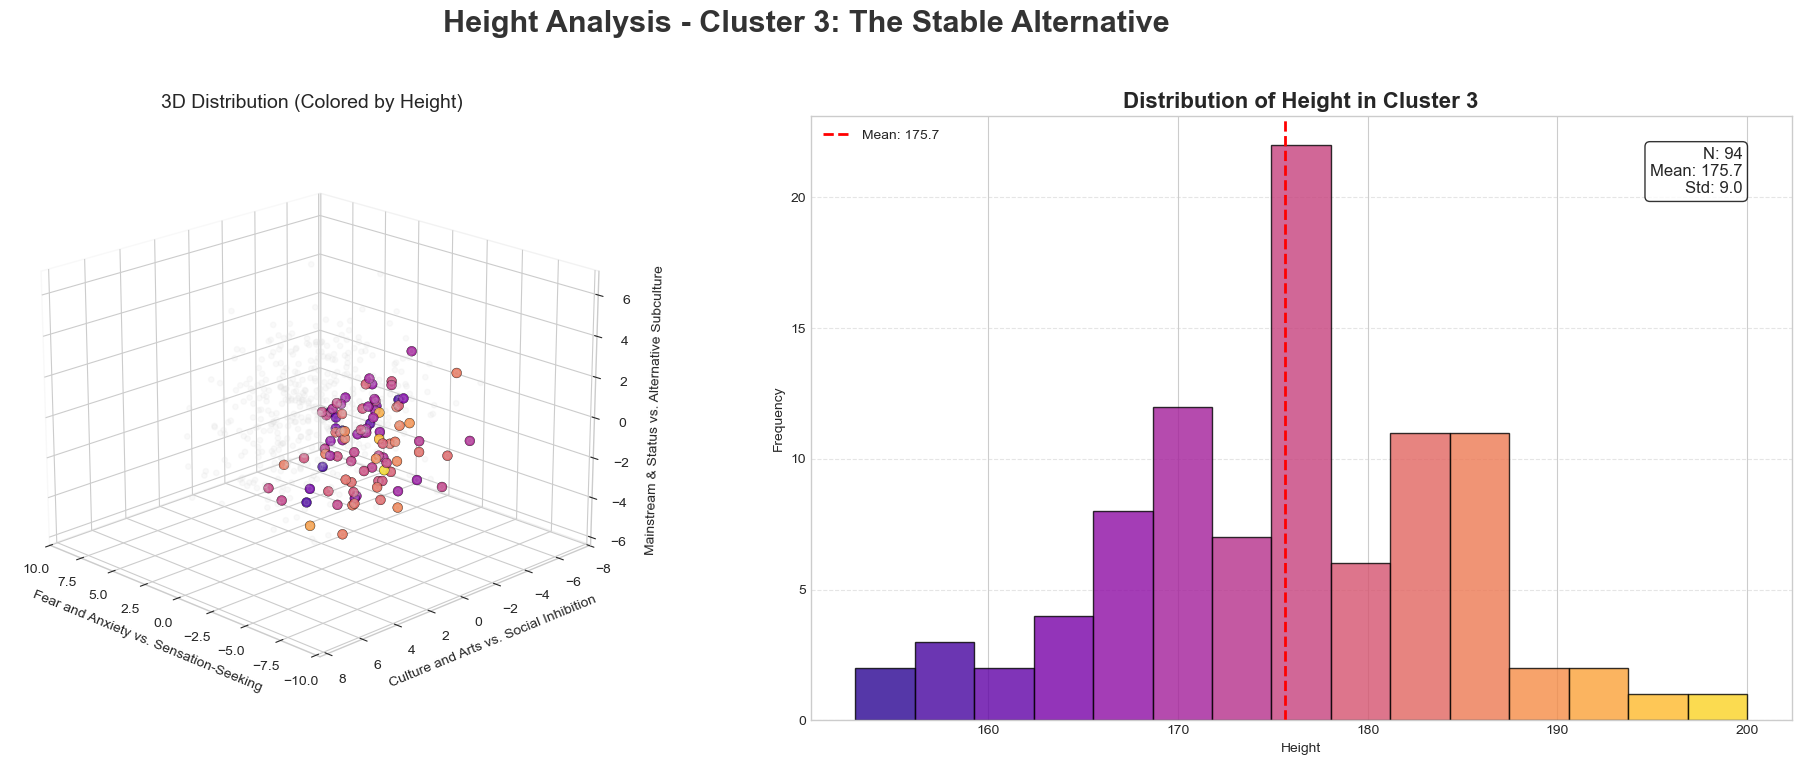

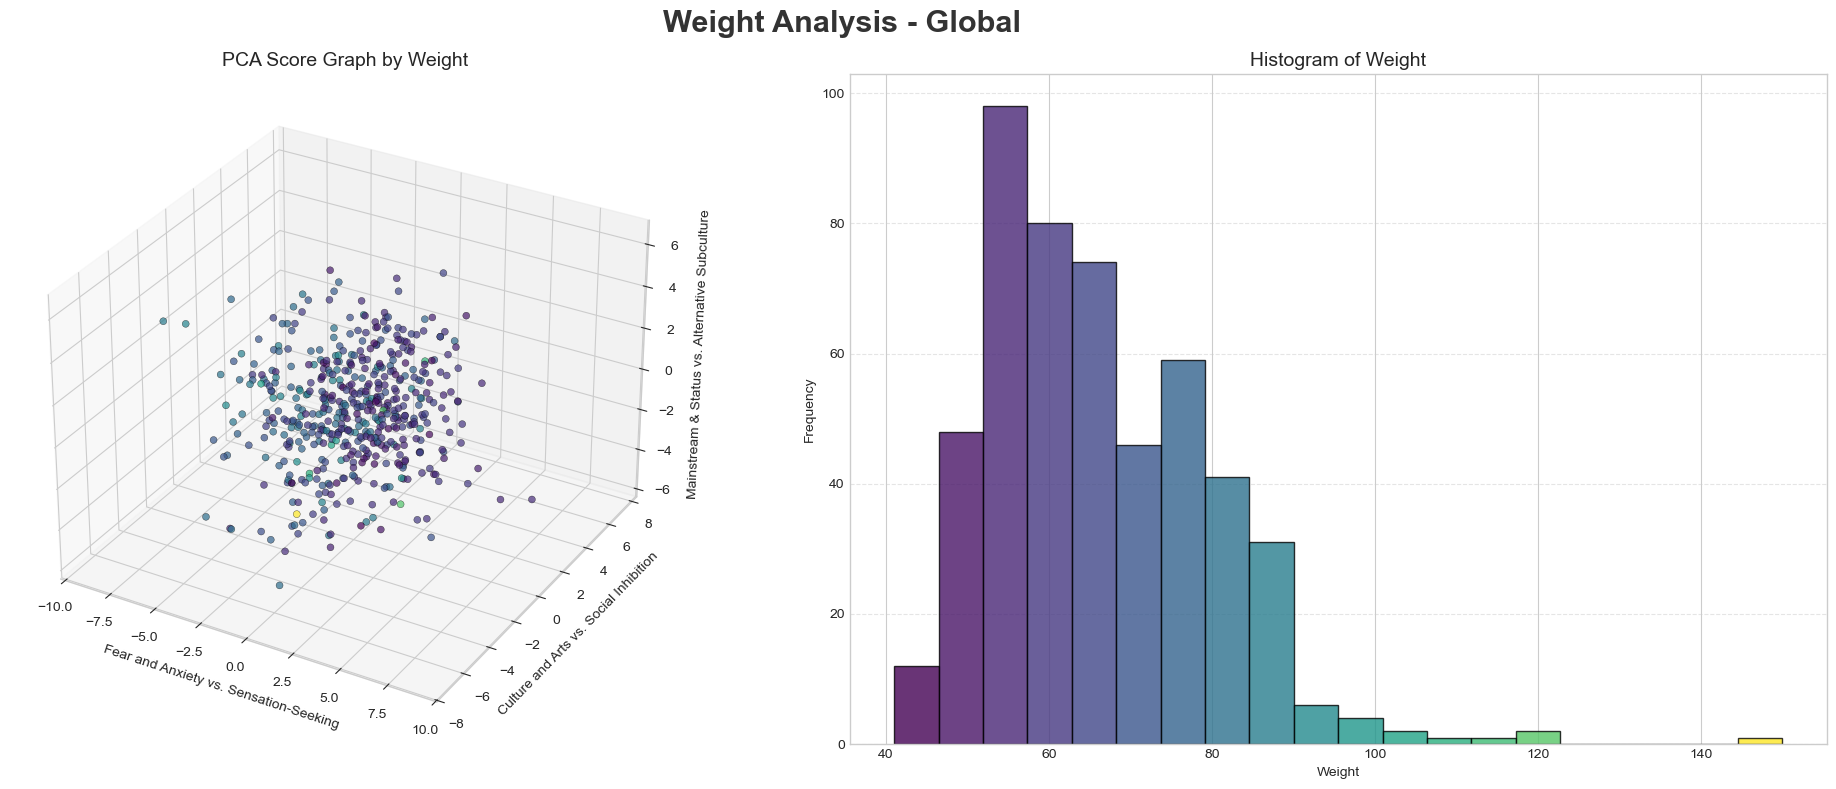

--- ANALYSIS FOR: Weight ---


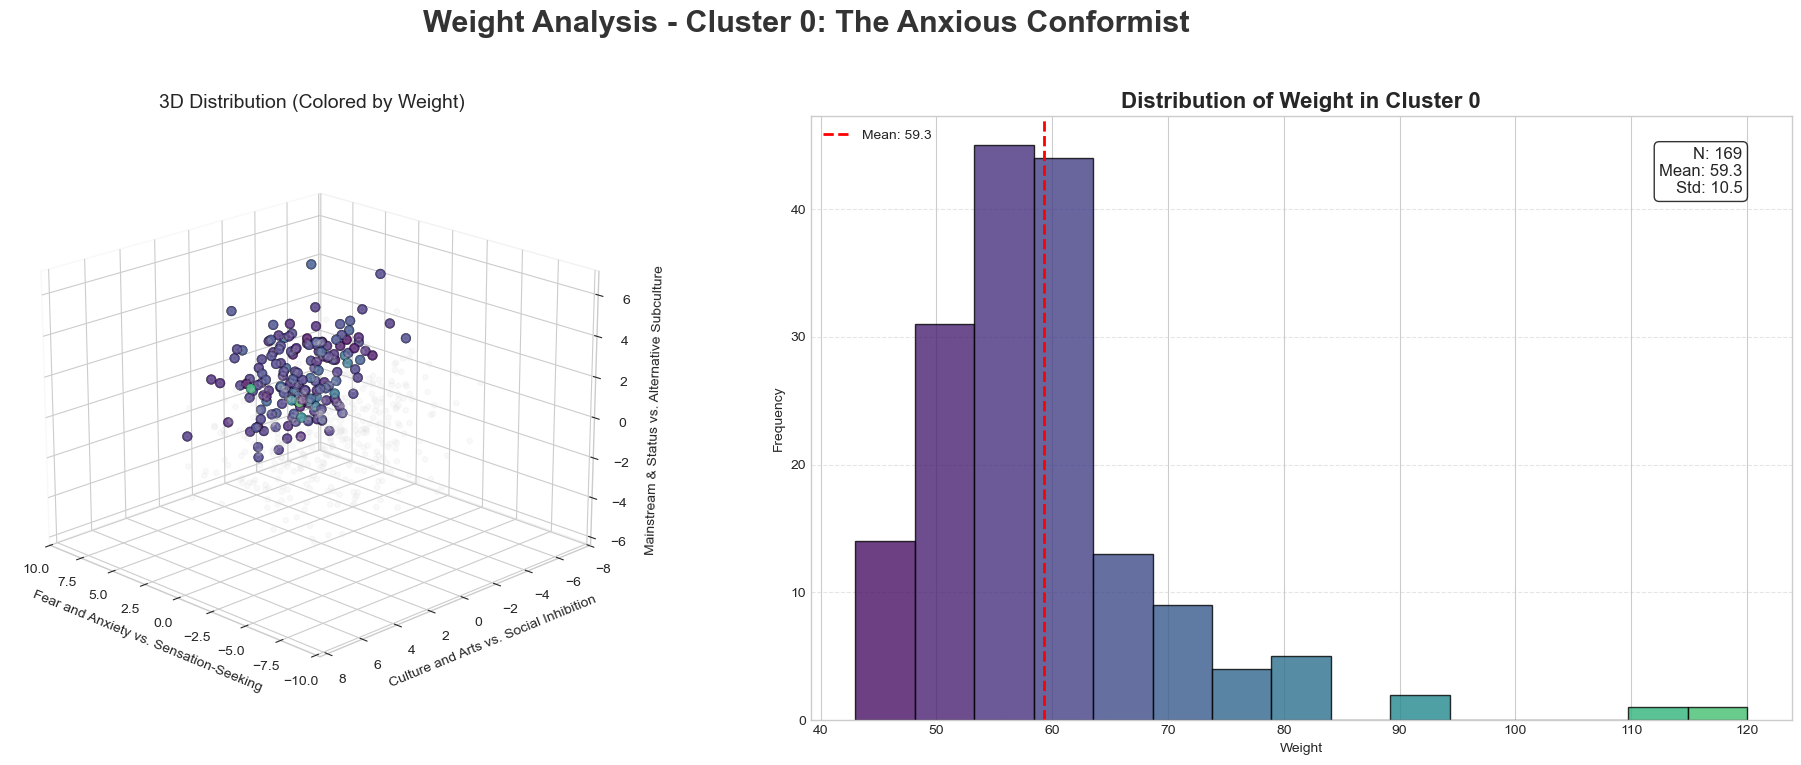

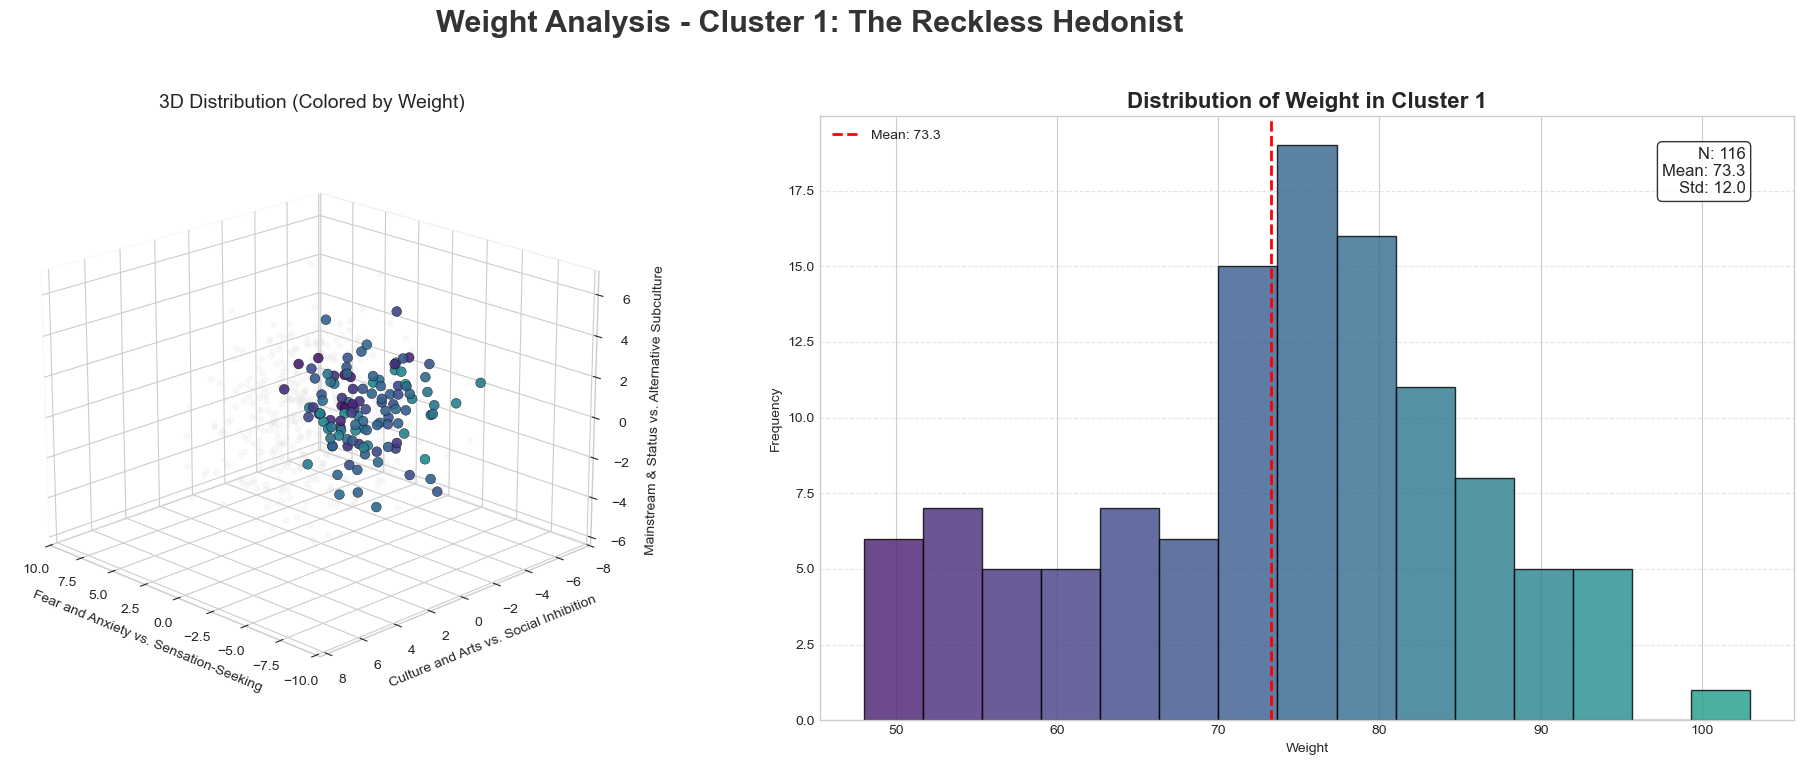

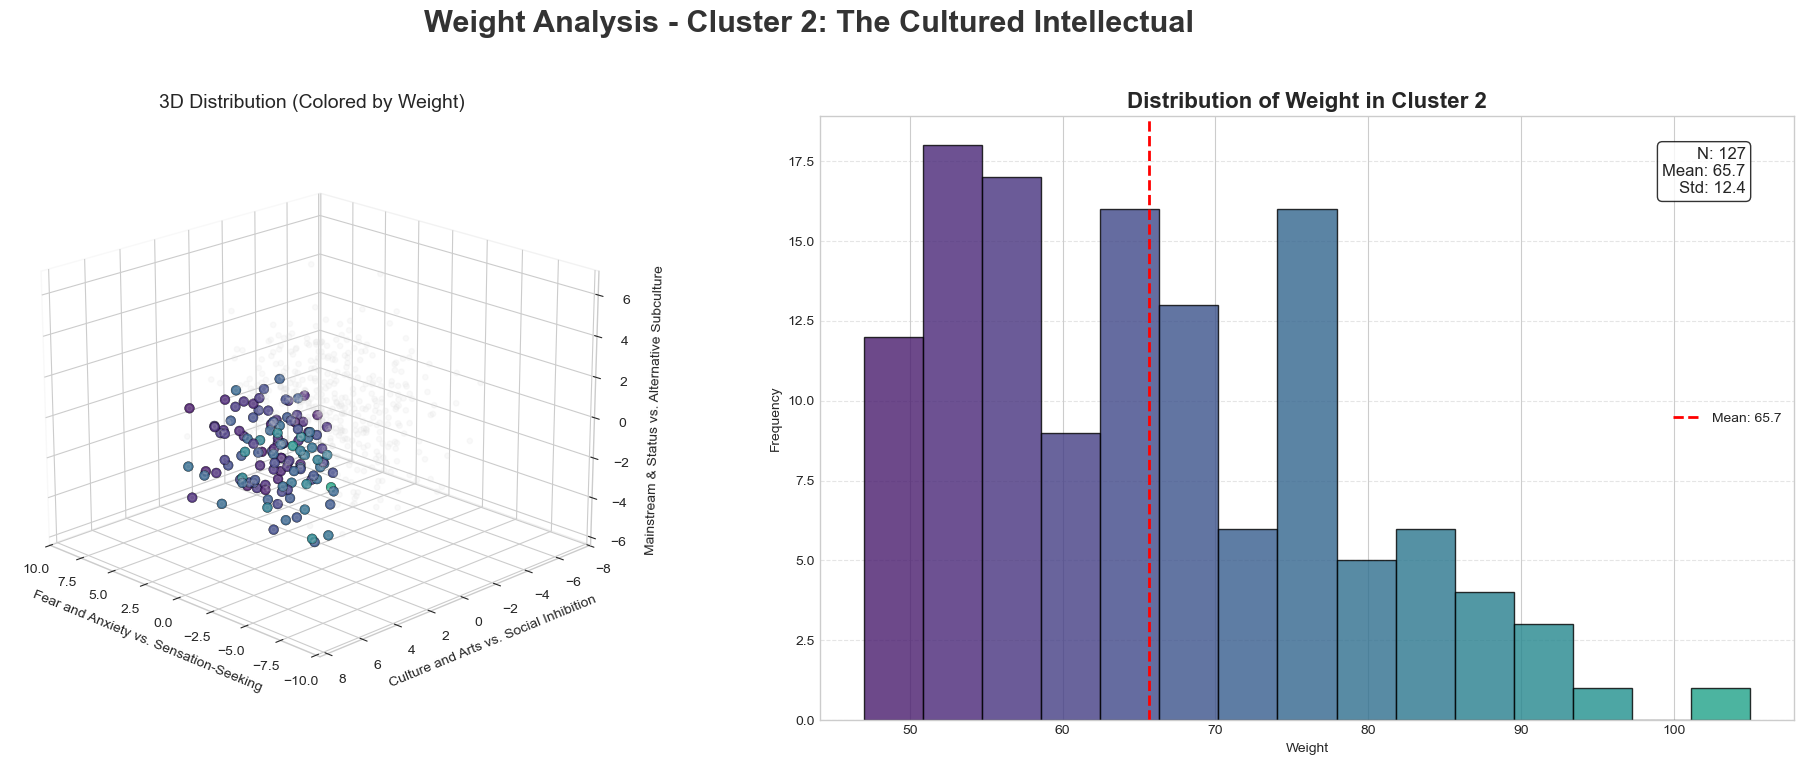

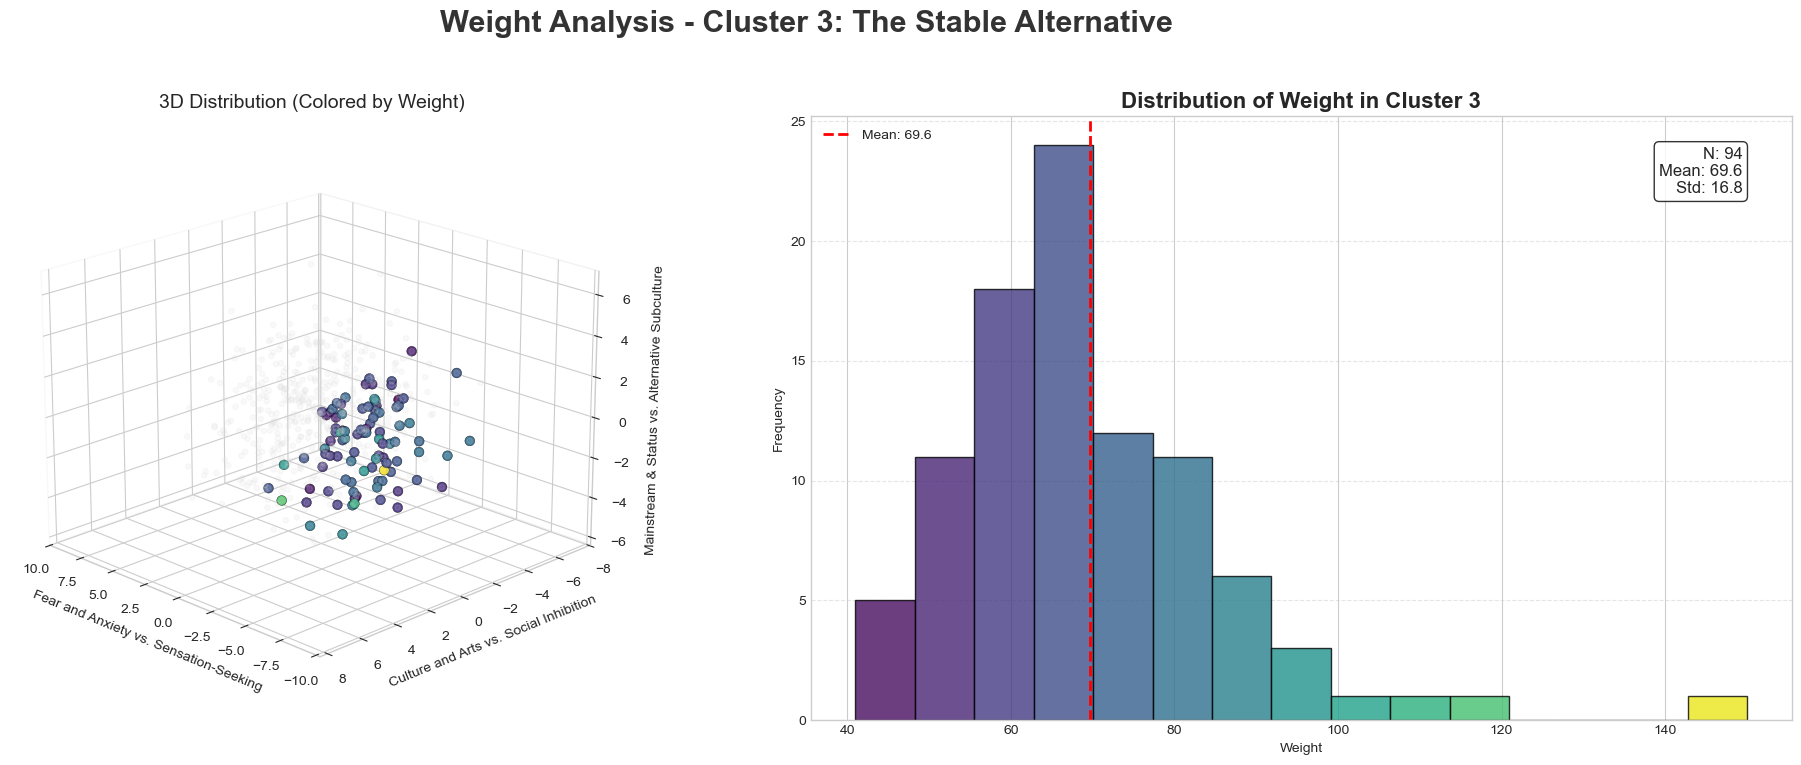

In [58]:
plt.style.use('seaborn-v0_8-whitegrid')
labels_array = np.array(cluster_labels)
unique_clusters = sorted(np.unique(labels_array))


xs = responses_ft_pca[:, 0]
ys = responses_ft_pca[:, 1]
zs = responses_ft_pca[:, 2]


def analyze_continuous_by_cluster(feature_name, data_series, cmap_name='viridis'):
    """
    Create a plot for each cluster, analyzing a specific label distribution (eg. Height).
    """

    global_min = data_series.min()
    global_max = data_series.max()
    
    print(f"--- ANALYSIS FOR: {feature_name} ---")

    for cluster_id in unique_clusters:
        
        mask_cluster = (labels_array == cluster_id)

        subset_data = data_series[mask_cluster].dropna() 
        subset_xs = xs[mask_cluster]
        subset_ys = ys[mask_cluster]
        subset_zs = zs[mask_cluster]
        
        if len(subset_data) != len(subset_xs):
            valid_indices = data_series[mask_cluster].notna()
            subset_xs = subset_xs[valid_indices]
            subset_ys = subset_ys[valid_indices]
            subset_zs = subset_zs[valid_indices]


        fig = plt.figure(figsize=(20, 8))
        fig.suptitle(f'{feature_name} Analysis - Cluster {cluster_id}: {cluster_names[cluster_id]}', fontsize=22, fontweight='bold', color='#333333')

        # -----------------------------
        # LEFT PLOT: 3D SCATTER
        # -----------------------------
        ax1 = fig.add_subplot(1, 2, 1, projection='3d')

        ax1.scatter(xs, ys, zs, c='gainsboro', s=15, alpha=0.15)

        scatter_plot = ax1.scatter(
            subset_xs, subset_ys, subset_zs,
            c=subset_data, cmap=cmap_name, vmin=global_min, vmax=global_max,
            edgecolor='k', linewidth=0.3, s=50, alpha=0.9
        )

        ax1.set_zlabel(f"{pc_names[2]}", fontsize=10)
        ax1.set_xlabel(f"{pc_names[0]}", fontsize=10)
        ax1.set_ylabel(f"{pc_names[1]}", fontsize=10)
        ax1.set_title(f'3D Distribution (Colored by {feature_name})', fontsize=14)
        
        ax1.xaxis.pane.fill = False
        ax1.yaxis.pane.fill = False
        ax1.zaxis.pane.fill = False
        ax1.grid(True, linestyle='--', alpha=0.3)
        ax1.view_init(elev=20, azim=135)
        
        #cbar = plt.colorbar(scatter_plot, ax=ax1, shrink=0.6)
        #cbar.set_label(feature_name)

        # -----------------------------
        # RIGHT PLOT: HISTOGRAM
        # -----------------------------
        ax2 = fig.add_subplot(1, 2, 2)

        mu = subset_data.mean()
        sigma = subset_data.std()
        n, bins, patches = ax2.hist(subset_data, bins=15, edgecolor='black', alpha=0.8)

        bin_centers = 0.5 * (bins[:-1] + bins[1:])
        col_norm = (bin_centers - global_min) / (global_max - global_min)
        
        cmap = plt.get_cmap(cmap_name)
        for c, p in zip(col_norm, patches):
            plt.setp(p, 'facecolor', cmap(c))

        ax2.axvline(mu, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mu:.1f}')
        
        ax2.set_title(f'Distribution of {feature_name} in Cluster {cluster_id}', fontsize=16, fontweight='bold')
        ax2.set_xlabel(feature_name)
        ax2.set_ylabel('Frequency')
        ax2.legend()
        ax2.grid(axis='y', linestyle='--', alpha=0.5)

        text_str = f'N: {len(subset_data)}\nMean: {mu:.1f}\nStd: {sigma:.1f}'
        ax2.text(0.95, 0.95, text_str, transform=ax2.transAxes, fontsize=12,
                 verticalalignment='top', horizontalalignment='right',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

# --- HEIGHT ---
plot_continuous_variable('Height', responses_lb['Height'], cmap_name='plasma')
analyze_continuous_by_cluster('Height', responses_lb['Height'], cmap_name='plasma')

# --- WEIGHT ---
plot_continuous_variable('Weight', responses_lb['Weight'], cmap_name='viridis')
analyze_continuous_by_cluster('Weight', responses_lb['Weight'], cmap_name='viridis')

#### For each selected label, comment the results observed in the visualizations (max 100 words per label):
Based on the plots, the analysis identifies four distinct archetypes driven by gender and cultural interests:

- **Cluster 0** (Mainstream Females): High PC1; characterized by sensitivity, focus on appearance, and pop culture.

- **Cluster 1** (Tech Males): Low PC1; defined by interests in technology, sci-fi, and action/adrenaline.

- **Cluster 2** (The Intellectuals): High PC2; a mixed-gender group passionate for "high culture" (theatre, opera, art exhibitions).

- **Cluster 3** (The Alternative): Low PC3; a mixed-gender group defined by a preference for Metal/Rock music and a rejection of mainstream pop.

Essentially, PC1 acts as a gender divider, while PC2 and PC3 distinguish cultural sub-tribes.


## Exercise 6. Cluster Internal Evaluations

In this exercise, you have to do the following operations:
1. For each cluster, measure the corresponding average silhouette score
1. Visualize the silhouette of the clusters and the general one of the clustering and compare them


#### Write the code for computing the silhouette scores and for visualizing them:

Mean Global Silhouette Score: 0.171
----------------------------------------
Mean Silhouette Score for each Cluster:
  Cluster The Anxious Conformist: 0.176
  Cluster The Reckless Hedonist: 0.185
  Cluster The Cultured Intellectual: 0.173
  Cluster The Stable Alternative: 0.141


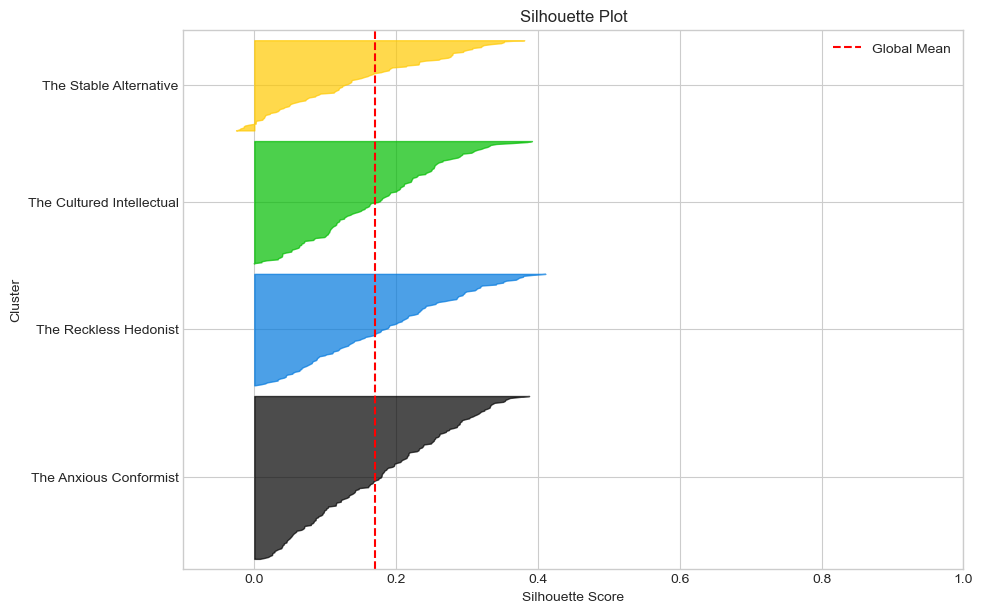

In [59]:
X_eval = responses_ft_pca      
labels_eval = cluster_labels   

n_clusters_eval = len(np.unique(labels_eval))

silhouette_avg = silhouette_score(X_eval, labels_eval)
print(f"Mean Global Silhouette Score: {silhouette_avg:.3f}")
print("-" * 40)

sample_silhouette_values = silhouette_samples(X_eval, labels_eval)
print("Mean Silhouette Score for each Cluster:")
for i in range(n_clusters_eval):
    ith_cluster_silhouette_values = sample_silhouette_values[labels_eval == i]
    print(f"  Cluster {cluster_names[i]}: {np.mean(ith_cluster_silhouette_values):.3f}")

plt.figure(figsize=(12, 7)) 
plt.xlim([-0.1, 1])
plt.ylim([0, len(X_eval) + (n_clusters_eval + 1) * 10])

y_lower = 10
yticks_pos = [] 
yticks_labels = []

for i in range(n_clusters_eval):
    ith_cluster_silhouette_values = sample_silhouette_values[labels_eval == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters_eval)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    yticks_pos.append(y_lower + 0.5 * size_cluster_i)
    yticks_labels.append(cluster_names[i])

    y_lower = y_upper + 10 

plt.title("Silhouette Plot")
plt.xlabel("Silhouette Score")
plt.ylabel("Cluster")


plt.axvline(x=silhouette_avg, color="red", linestyle="--", label="Global Mean")

plt.yticks(yticks_pos, yticks_labels)
plt.subplots_adjust(left=0.25) 

plt.legend()
plt.show()

#### Comment the results, also considering the results observed previously (e.g., score graphs, centroids, etc. - max 150 words):

...